# Billboard Top 100: Through the Decades (1965-2015)

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('seaborn-darkgrid')

import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from gensim import corpora, models

import nltk

from helper import *

In [4]:
def top_20_words(fitted_and_transformed, feature_names):
    plt.subplots(dpi=300)
    sns.set(font_scale=.8)
    sorted_words = sorted(list(zip(feature_names, np.asarray(fitted_and_transformed.sum(axis=0)).ravel())), 
                               key=lambda x: x[1], reverse=True)
    words, count = [i[0] for i in sorted_words], [i[1] for i in sorted_words]
    return words[:20], count[:20]

def plot_top_20(words, count, decade):
    plt.subplots(dpi=300)
    sns.set(font_scale=.8)
    top_words = pd.DataFrame(data={'Word' : words, 'Count': count}).take([1, 0], axis=1).iloc[np.arange(20)]
    plt.title('Word Count From Songs of the '+ str(decade) + 's')
    sns.barplot(x = top_words['Count'], y=top_words['Word'], palette=("GnBu_d"));

def NMF_topics(lyrics, num_topics, num_words, change_max_df=0.95, change_min_df=2):
    vectorizer = TfidfVectorizer(max_df=change_max_df, min_df=change_min_df, stop_words=stop)
    tfidf = vectorizer.fit_transform(lyrics)
    tfidf_fn = vectorizer.get_feature_names()
    NMF_model = NMF(n_components=num_topics, random_state=1, init='nndsvd').fit(tfidf)
    show_sk_topics(NMF_model, tfidf_fn, num_words)
    
#Found this online
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for item in sorted_scores[:20]:
        print("{0:10} Score: {1}".format(item[0], item[1]))

----

# The Data

In [5]:
lyrics = pd.read_csv('billboard.csv', encoding = "latin1")
lyrics.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


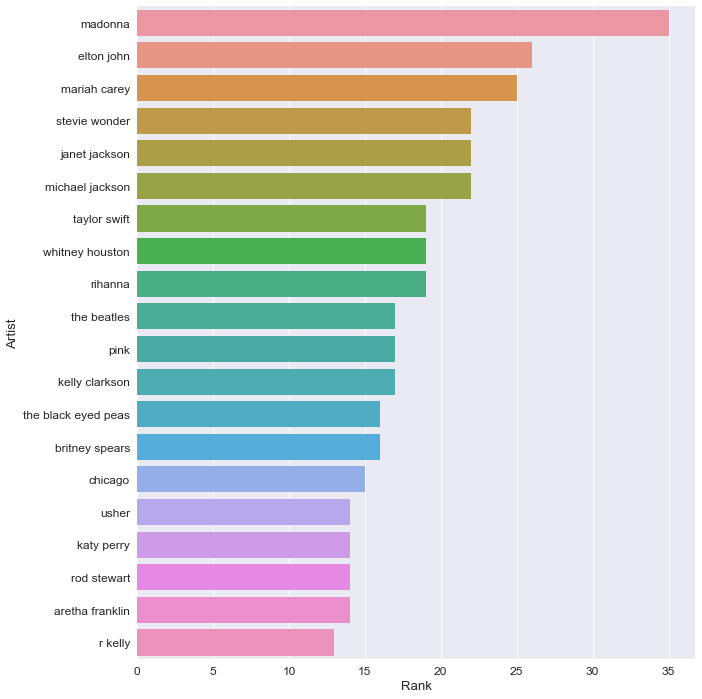

In [7]:
plt.figure(figsize=(10, 12))
sns.set(font_scale=1.2)
artist = lyrics.groupby('Artist').count()
num_b = artist.sort_values('Rank', ascending=False)[:20]

sns.barplot(y=num_b.index, x=num_b['Rank'], orient='h', order=num_b.index);

In [8]:
from sklearn.feature_extraction import stop_words

more_stop_words = set(['im', 'like', 'it', 'dont', 'aint', 'ive', 'ill', 
                       'wont', 'gonna', 'youre','just','got','theres',
                       'let','oh', 'come', 'want', 'good','make', 'cause',
                       'shes', 'hes', 'lets', 'theyll', 'youll', 'youve',
                       'id', 'thats', 'way', 'wanna', 'know', 'imma', 'theyre', 'youd'])
stop = stop_words.ENGLISH_STOP_WORDS.union(more_stop_words)

----
## Through the Decades

## 1965-1969

Implementing a topic model for the years 1965-1969, the first decade in this analysis.

In [9]:
decade1lyrics = lyrics[lyrics['Year'] < 1970]['Lyrics'].values
decade1lyrics = [i for i in decade1lyrics if type(i) == str] #Handle NaN values.

#tfidf1_vectorizer = TfidfVectorizer(max_df=0.25, min_df=2, stop_words=stop)
#tfidf1 = tfidf_vectorizer.fit_transform(decade1lyrics)
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()

count_vec1 = CountVectorizer(max_df=0.65, min_df=2, stop_words=stop)
cv1 = count_vec1.fit_transform(decade1lyrics)
cv_fn1 = count_vec1.get_feature_names()

decade1LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=29, 
                                       learning_decay=.7,
                                       max_iter=130,
                                       learning_method='online').fit(cv1)

show_sk_topics(decade1LDA, cv_fn1, 15)

Topic 0:
love baby time la need heart say world long tell hold mind life sweet think
Topic 1:
yeah day help happy say comes black gotta washed round time shake away working monday
Topic 2:
na dig baby bop real red lady ready send sound gas yes grass rollin blue
Topic 3:
home babe ha said didnt mony think green everybody alright born did took yellow free
Topic 4:
girl lovin night gimme light baby day hair sweet proud eyes gone used need people
Topic 5:
little hey man soul place ah bit dance da laughing new whats look away better


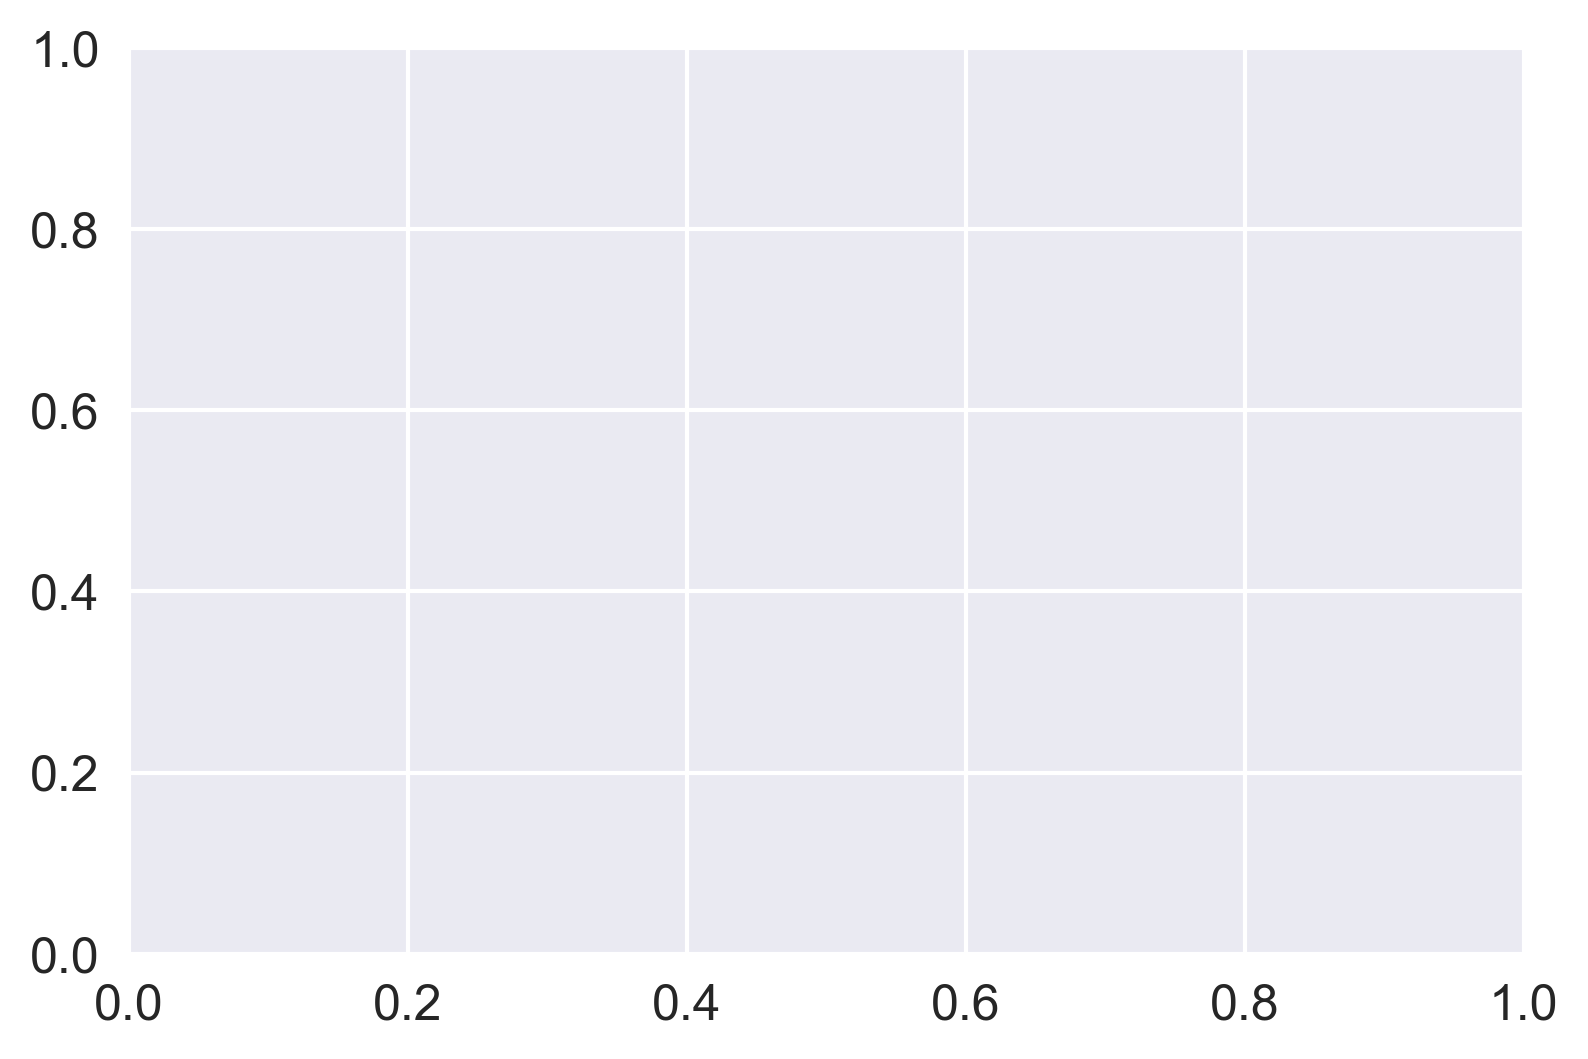

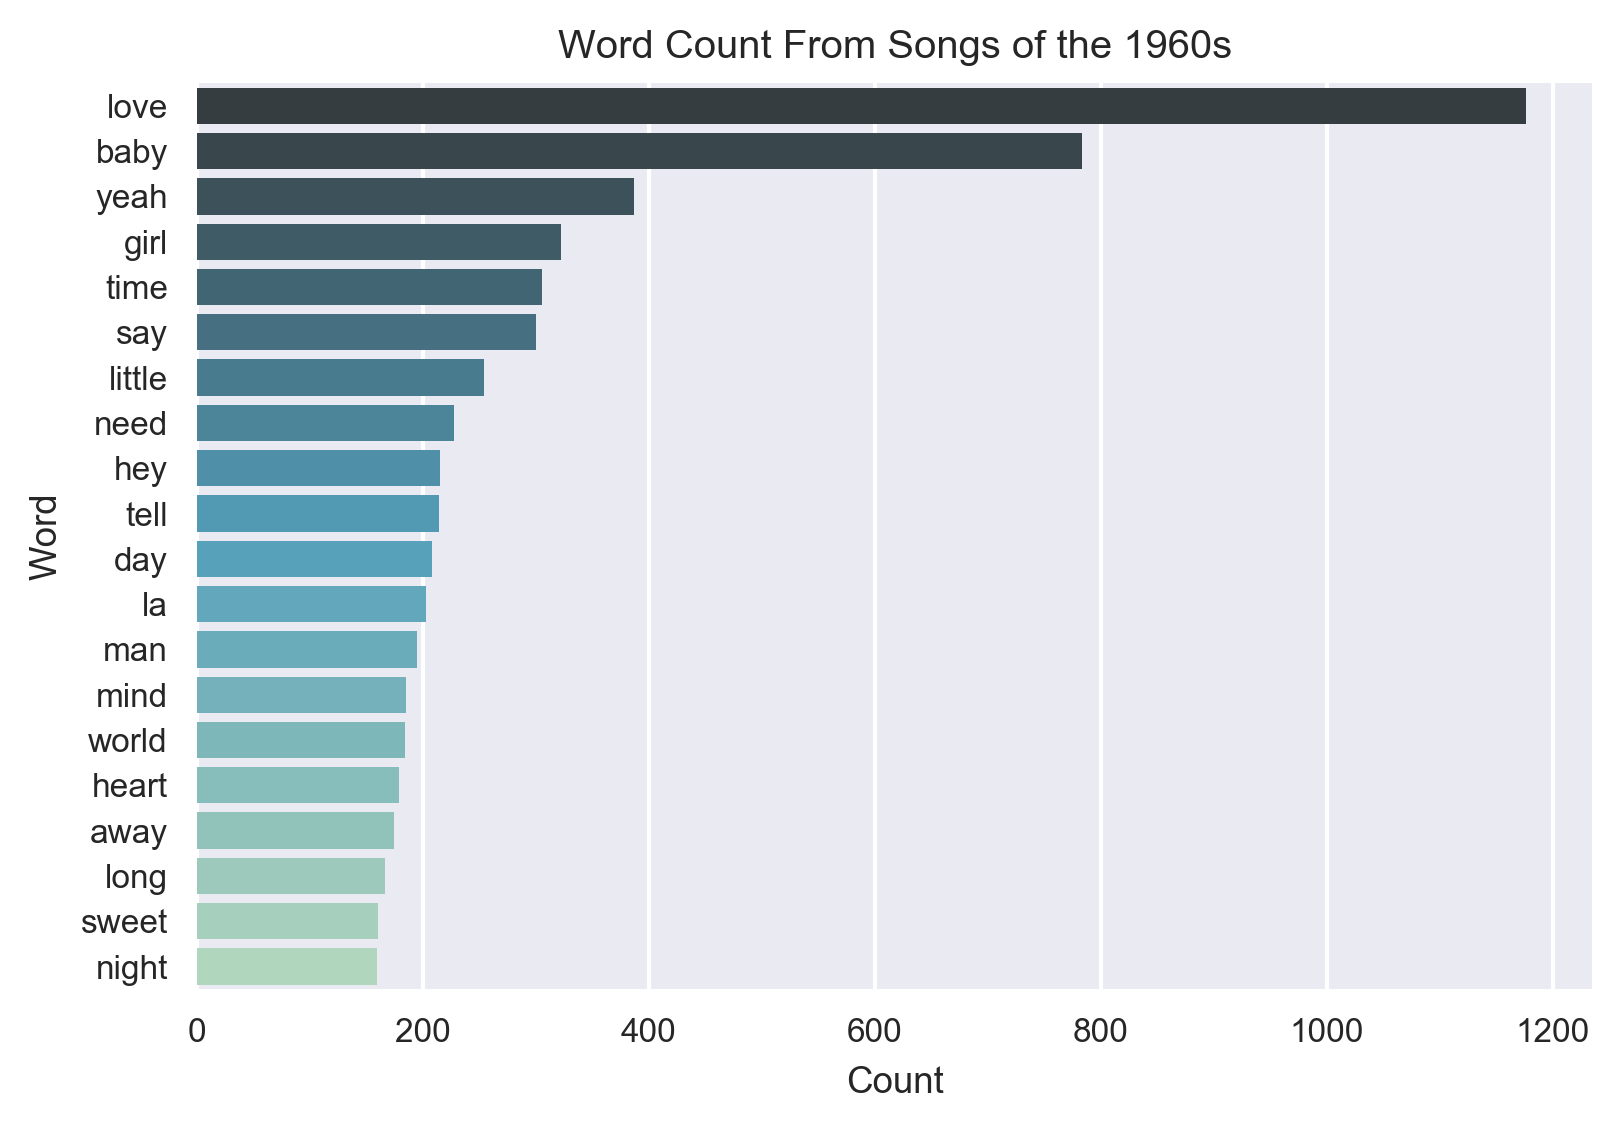

In [10]:
words1, count1 = top_20_words(cv1, cv_fn1)
plot_top_20(words1, count1, 1960)

In [11]:
from matplotlib import cm

donut_plot_colors = [i for i in cm.GnBu(np.arange(0, 255, 12))][::-1]

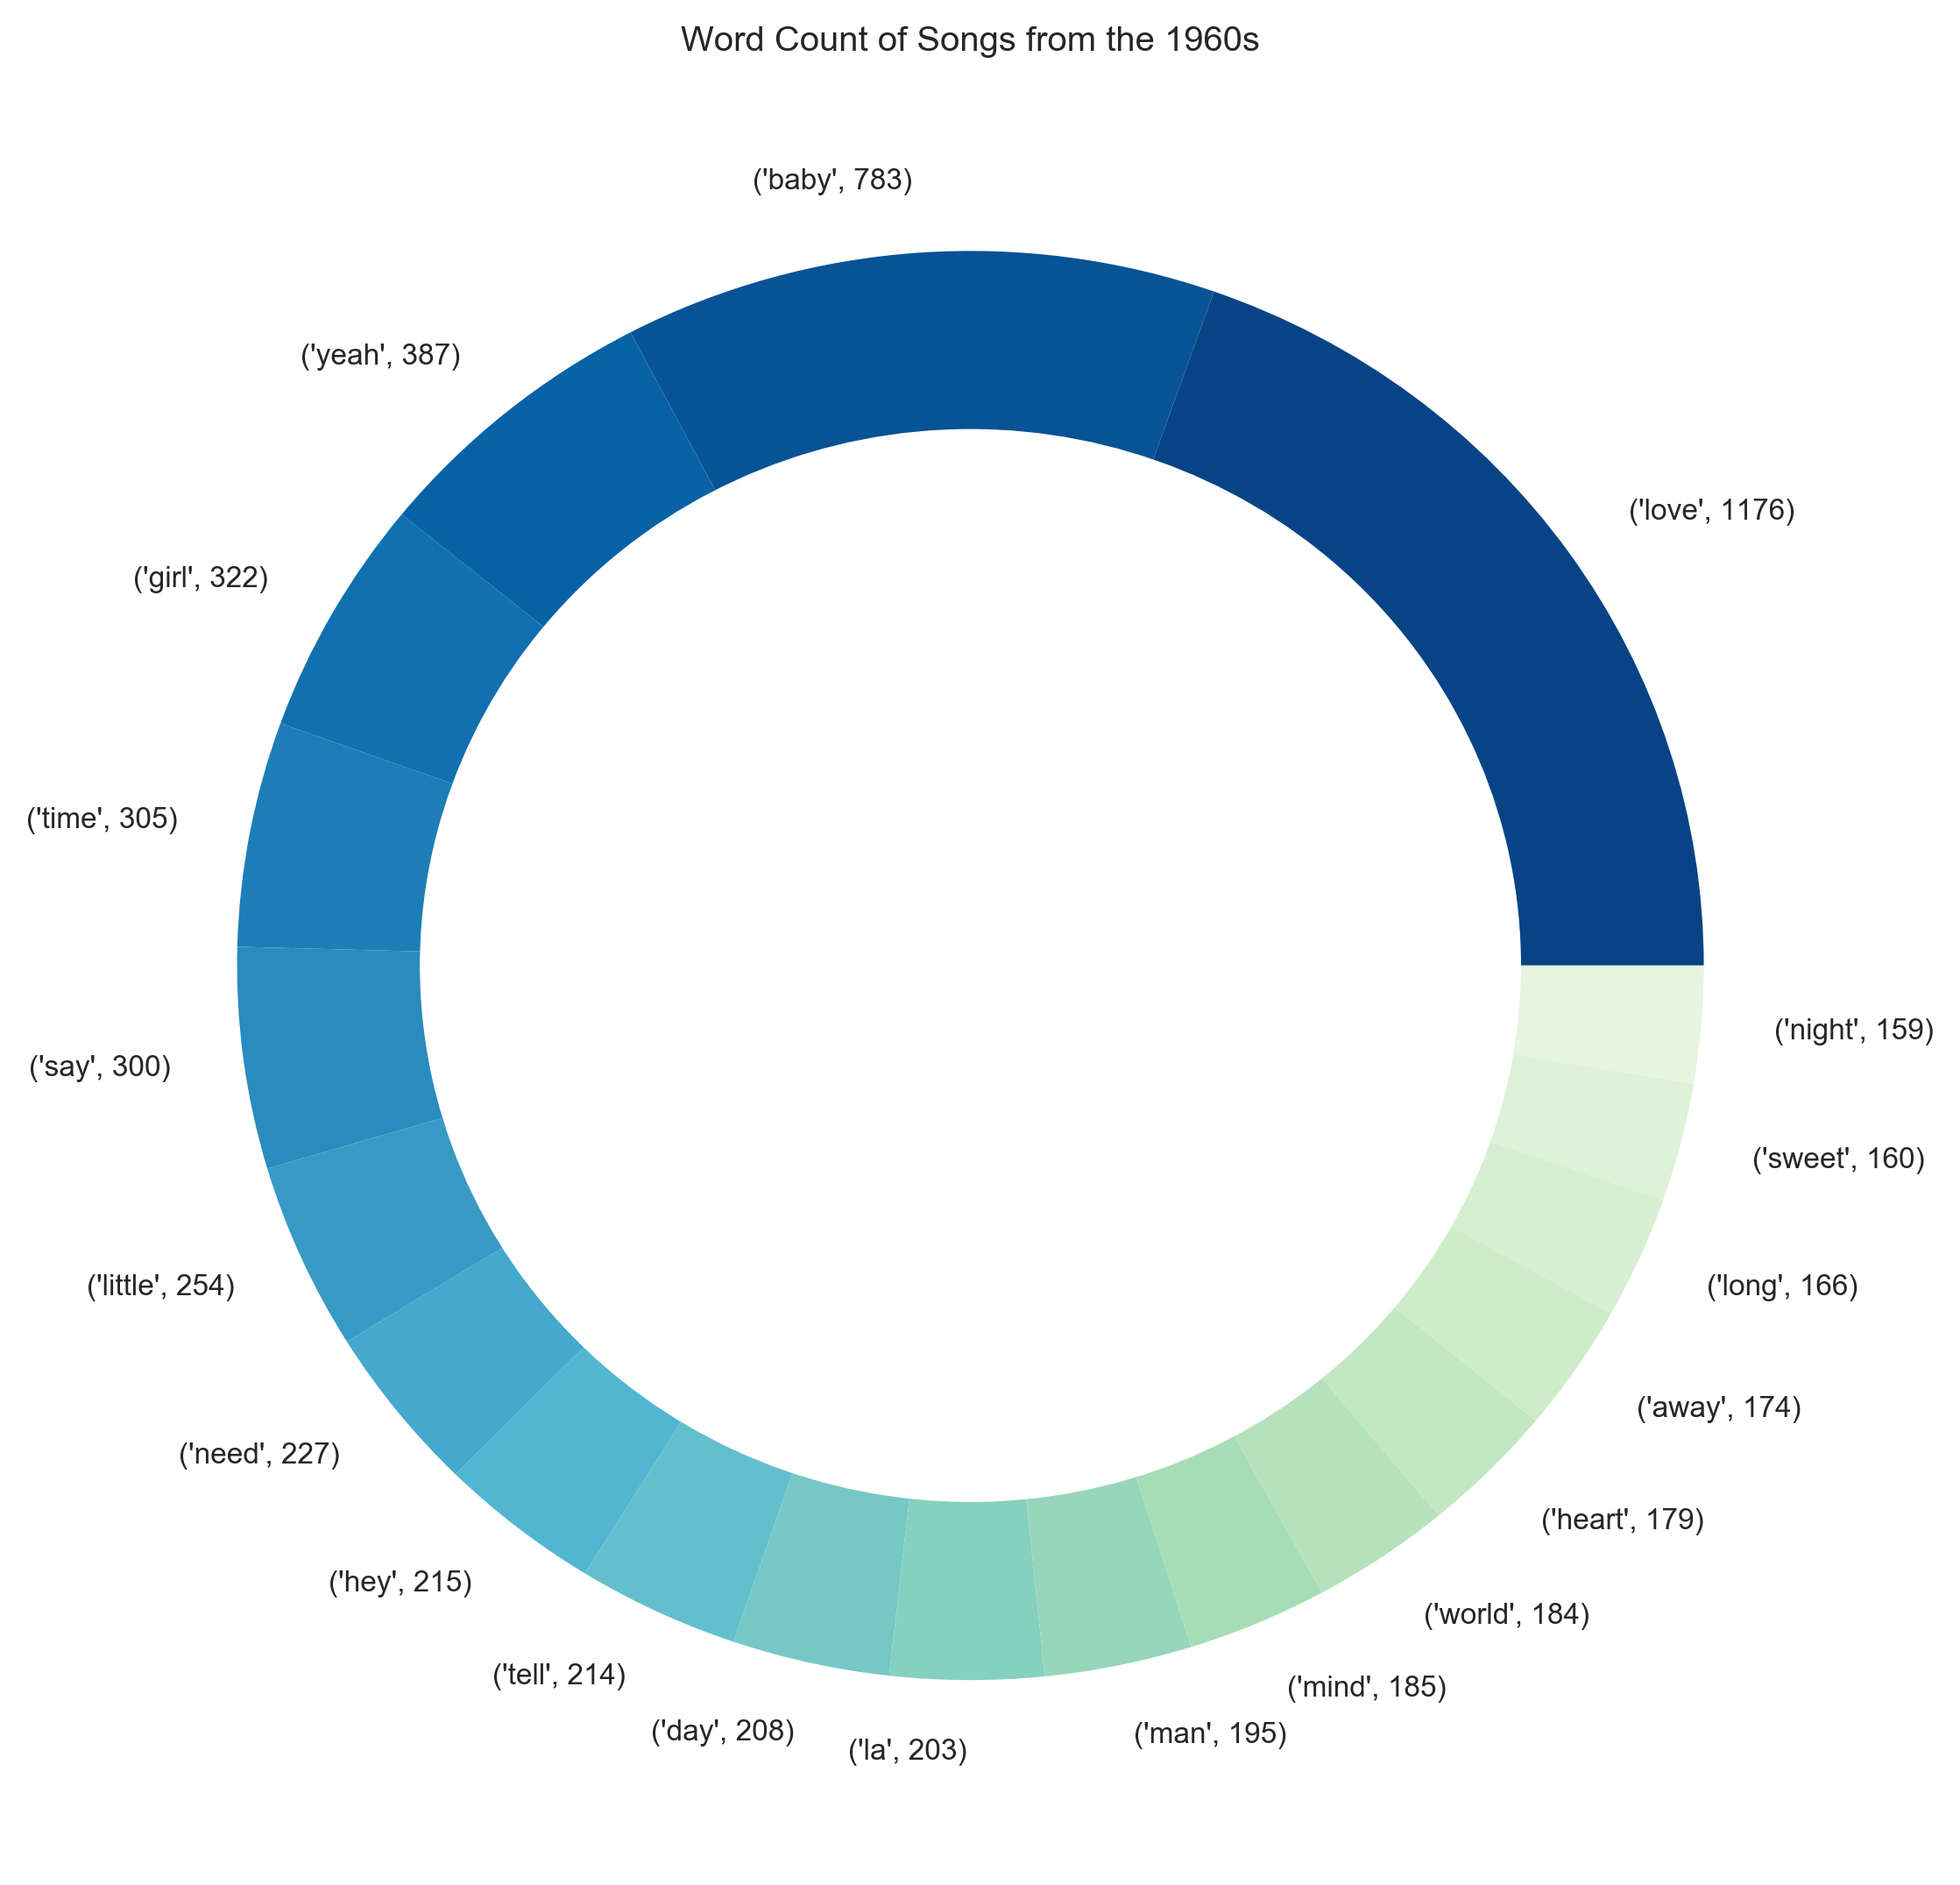

In [12]:
plt.figure(dpi=300, figsize=(9, 9))
my_circle=plt.Circle((0,0), 0.75, color='white')
plt.pie(count1, labels=list(zip(words1, count1)), colors=donut_plot_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Word Count of Songs from the 1960s')
plt.show()

----
## 1970-1979

In [815]:
decade2lyrics = lyrics[lyrics['Year'].between(1970, 1979, inclusive=True)]['Lyrics'].values
decade2lyrics = [i for i in decade2lyrics if type(i) == str]

count_vec2 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv2 = count_vec2.fit_transform(decade2lyrics)
cv_fn2 = count_vec2.get_feature_names()

decade2LDA = LatentDirichletAllocation(n_components=5, 
                                       batch_size=50, 
                                       learning_decay=.65,
                                       max_iter=50,
                                       learning_method='online').fit(cv2)

show_sk_topics(decade2LDA, cv_fn2, 15)

Topic 0:
night ya rock gone little roll hey time gold left soul band far away ba
Topic 1:
dance la said yeah da man hot yes doo dancing night thing sing song long
Topic 2:
away woman light hear people new sky leave music yeah run rain night walk mind
Topic 3:
boogie shake bring yeah gimme funk somebody lady em alive everybody whoa ride gotta disco
Topic 4:
love baby time feel say girl right need tell little ooh yeah sweet day heart


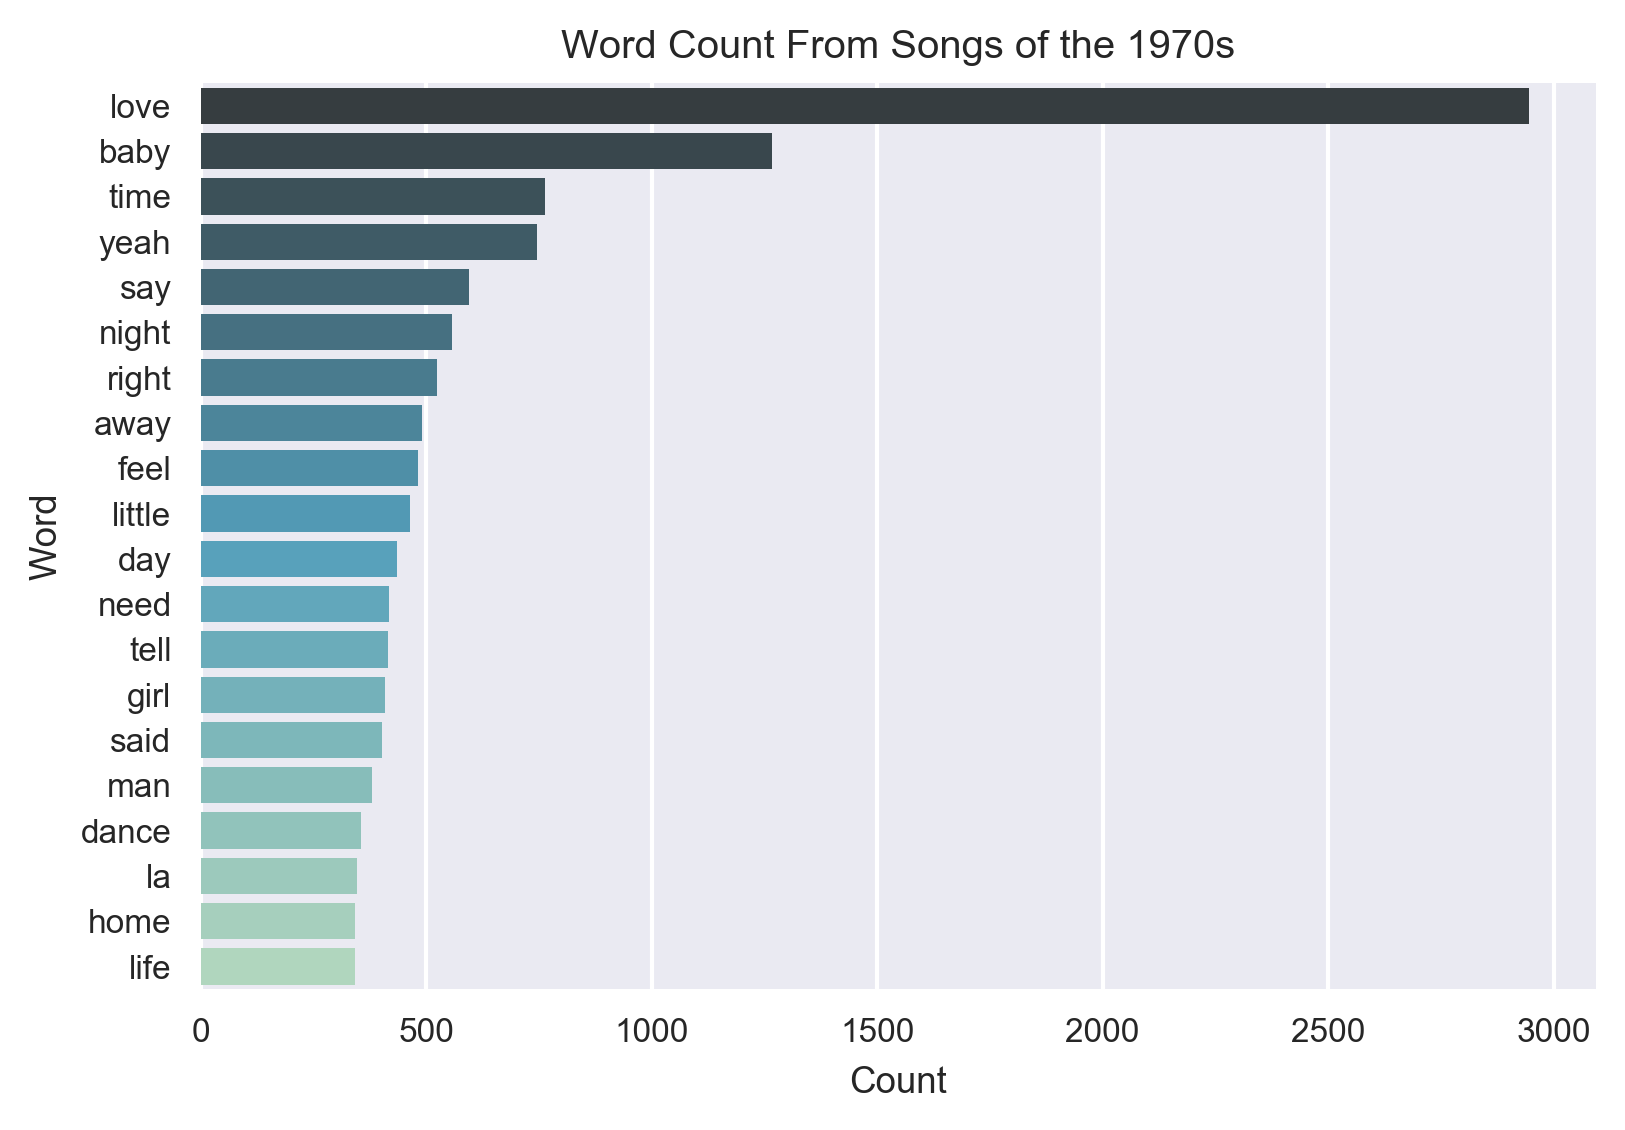

In [816]:
words2, count2 = top_20_words(cv2, cv_fn2)
plot_top_20(words2, count2, 1970)


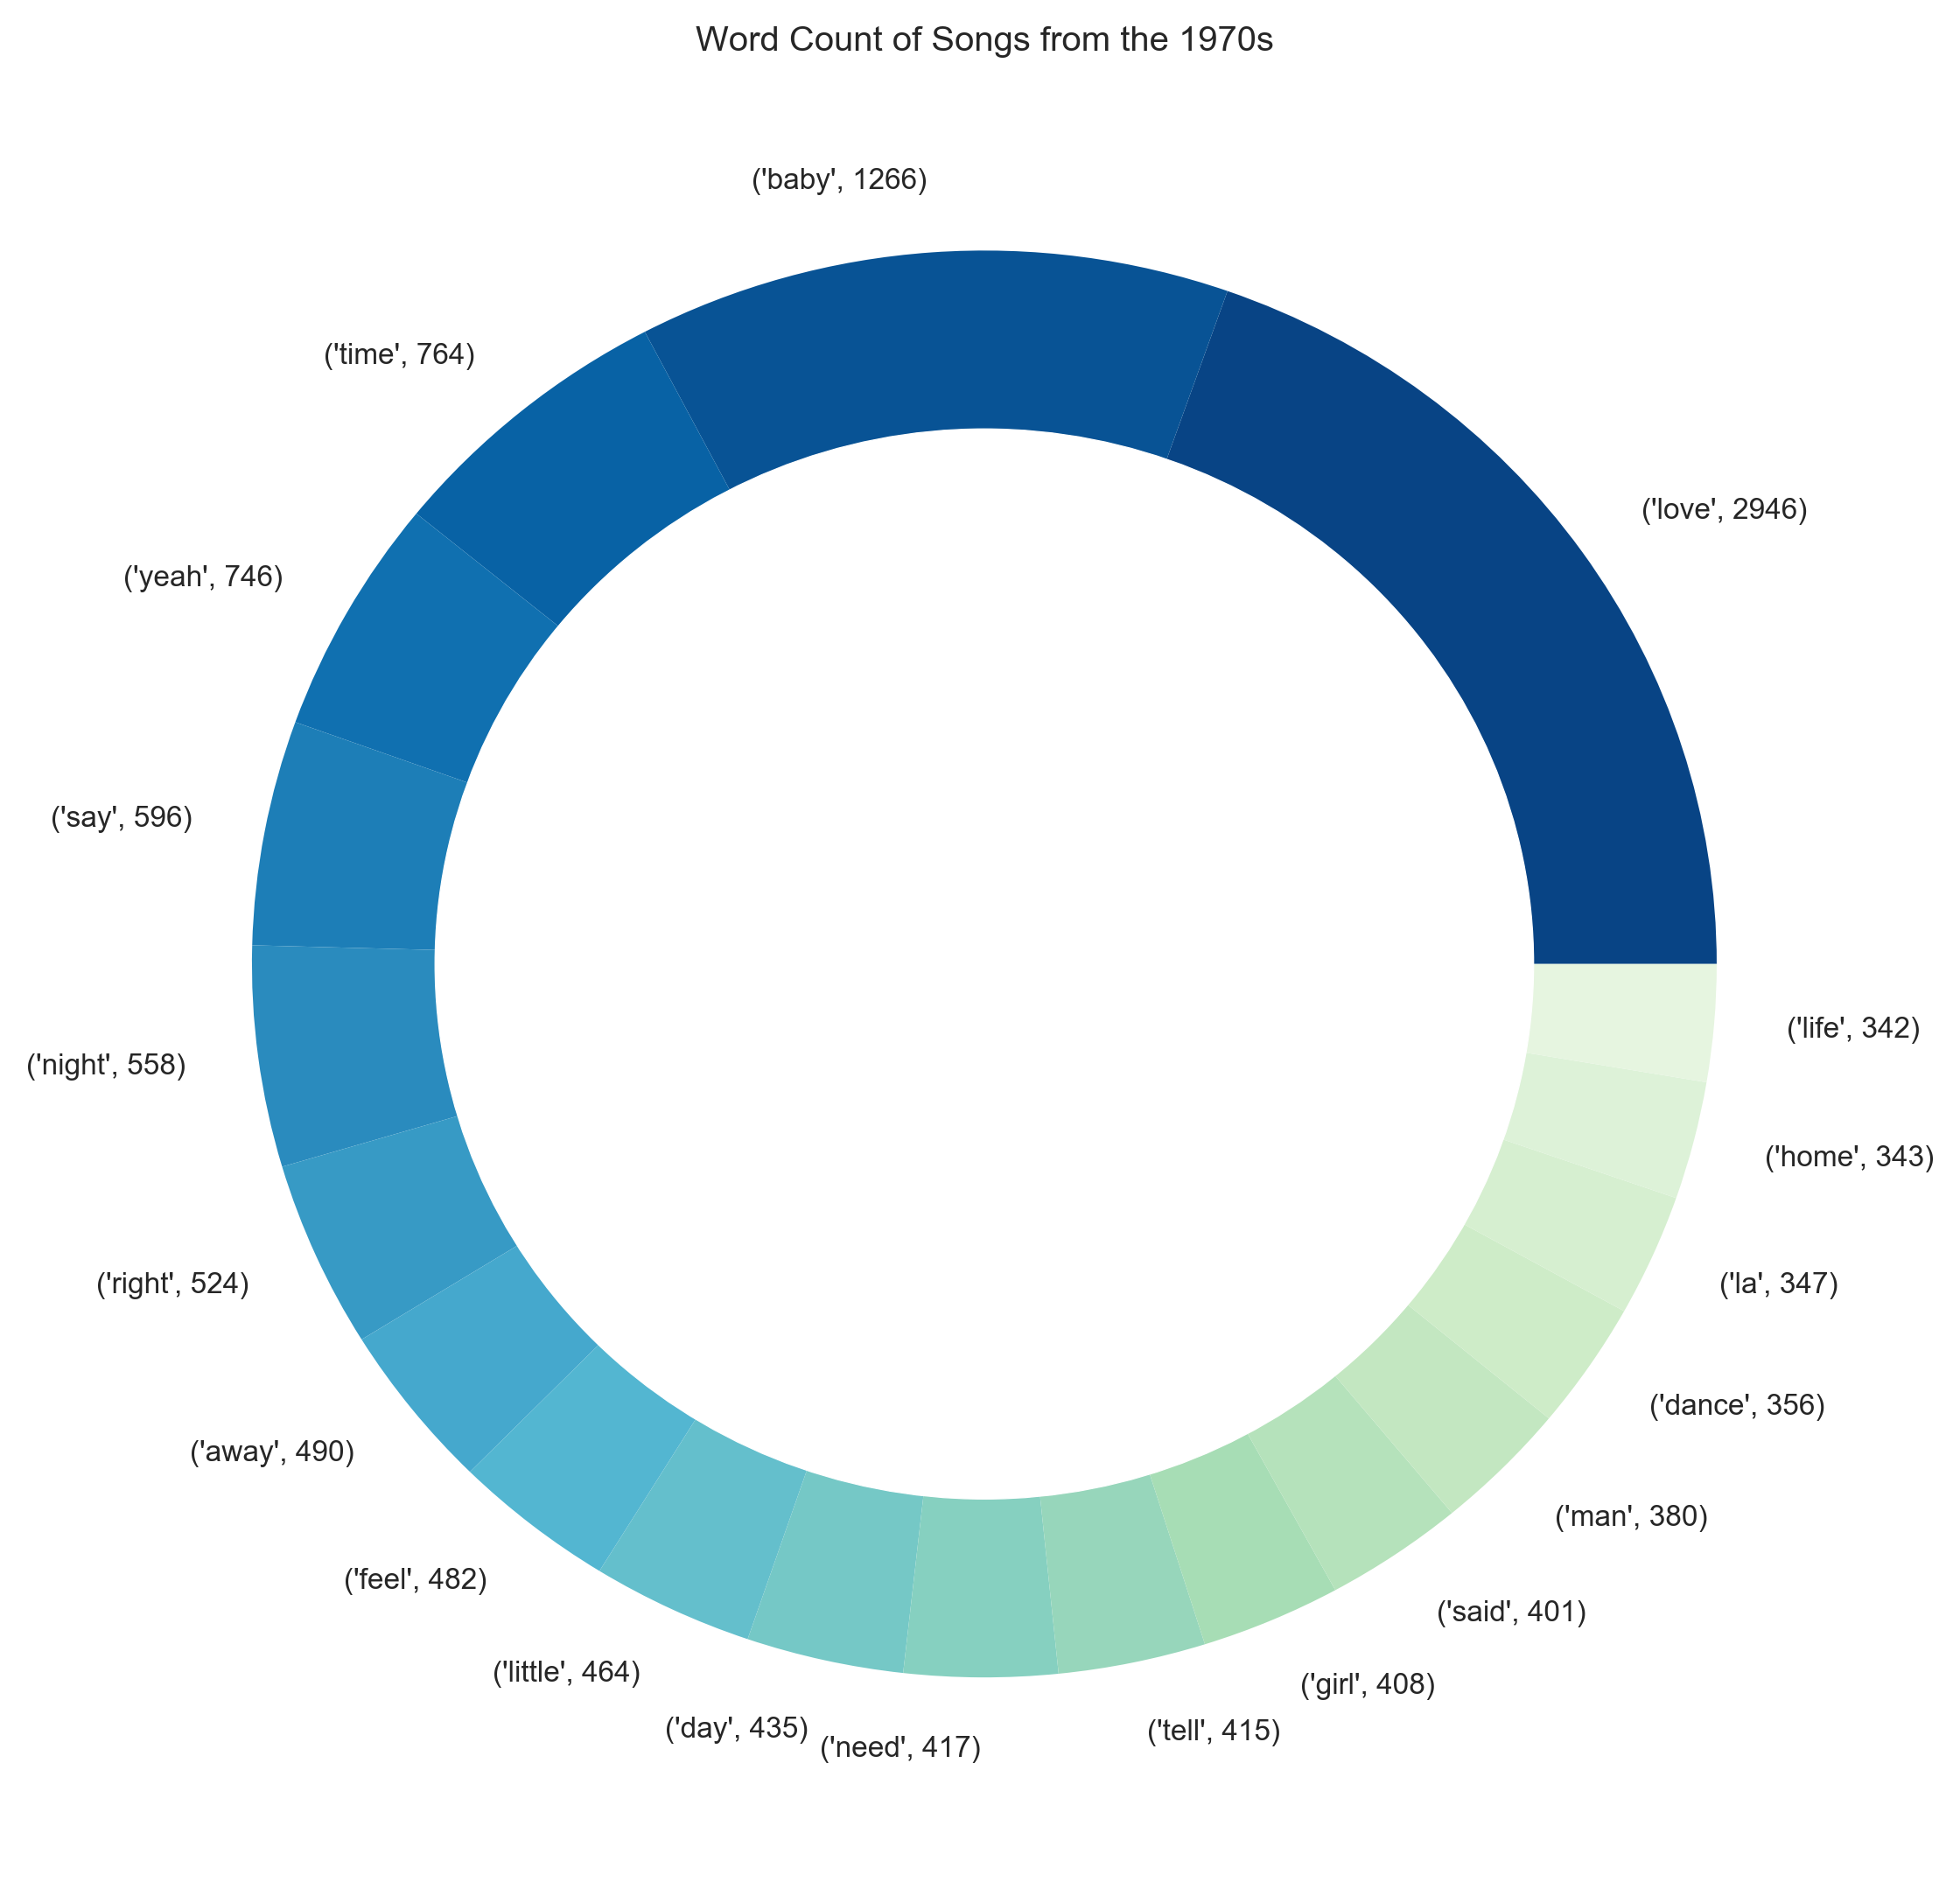

In [817]:
plot_donut(words2, count2, 1970)

----

## 1980-1990

In [818]:
decade3lyrics = lyrics[lyrics['Year'].between(1980, 1989, inclusive=True)]['Lyrics'].values
decade3lyrics = [i for i in decade3lyrics if type(i) == str]

count_vec3 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv3 = count_vec3.fit_transform(decade3lyrics)
cv_fn3 = count_vec3.get_feature_names()

decade3LDA = LatentDirichletAllocation(n_components=4, 
                                       batch_size=6, 
                                       learning_decay=.65,
                                       max_iter=50,
                                       learning_method='online').fit(cv3)

show_sk_topics(decade3LDA, cv_fn3, 15)

Topic 0:
love baby right hold eyes feel sweet forever night need heart away mind rain true
Topic 1:
yeah night tonight dance na rock talk la right feel girls beat uh hey body
Topic 2:
girl little ooh bad yeah stand look thing gotta dream boy crazy long whos baby
Topic 3:
time say tell heart life away need think day really world better feel live did


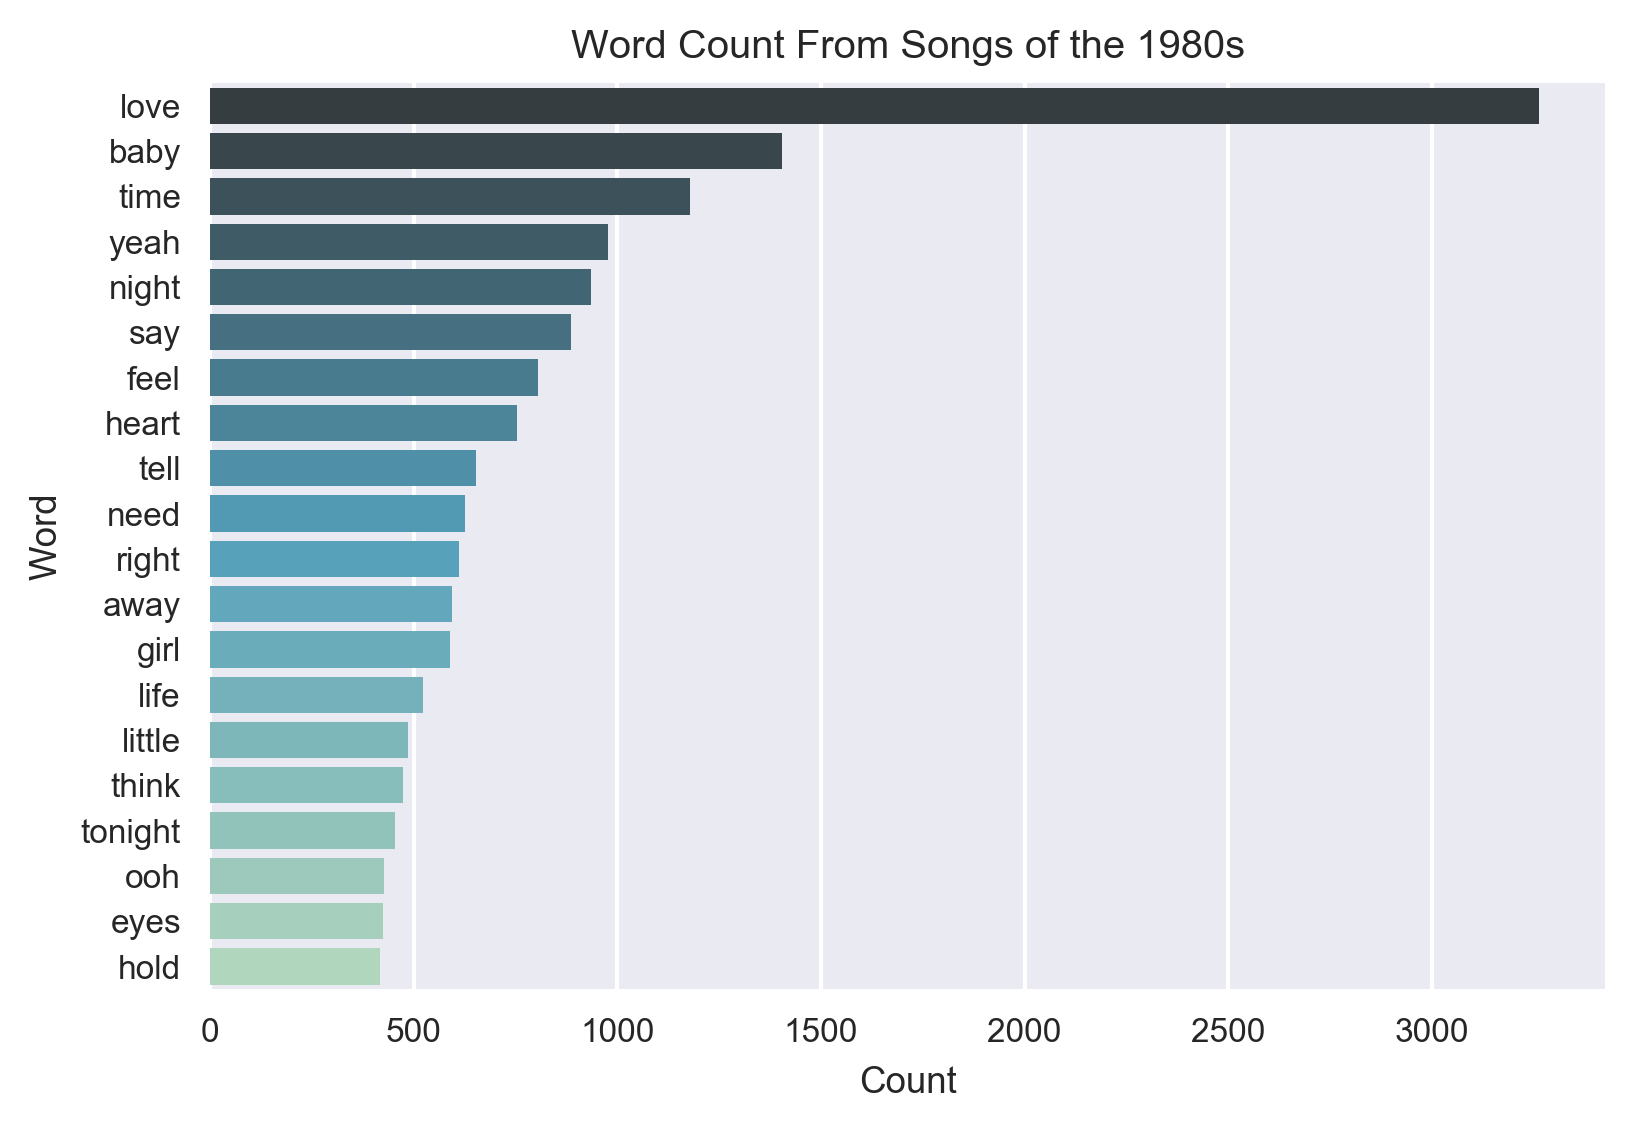

In [819]:
words3, count3 = top_20_words(cv3, cv_fn3)
plot_top_20(words3, count3, 1980)

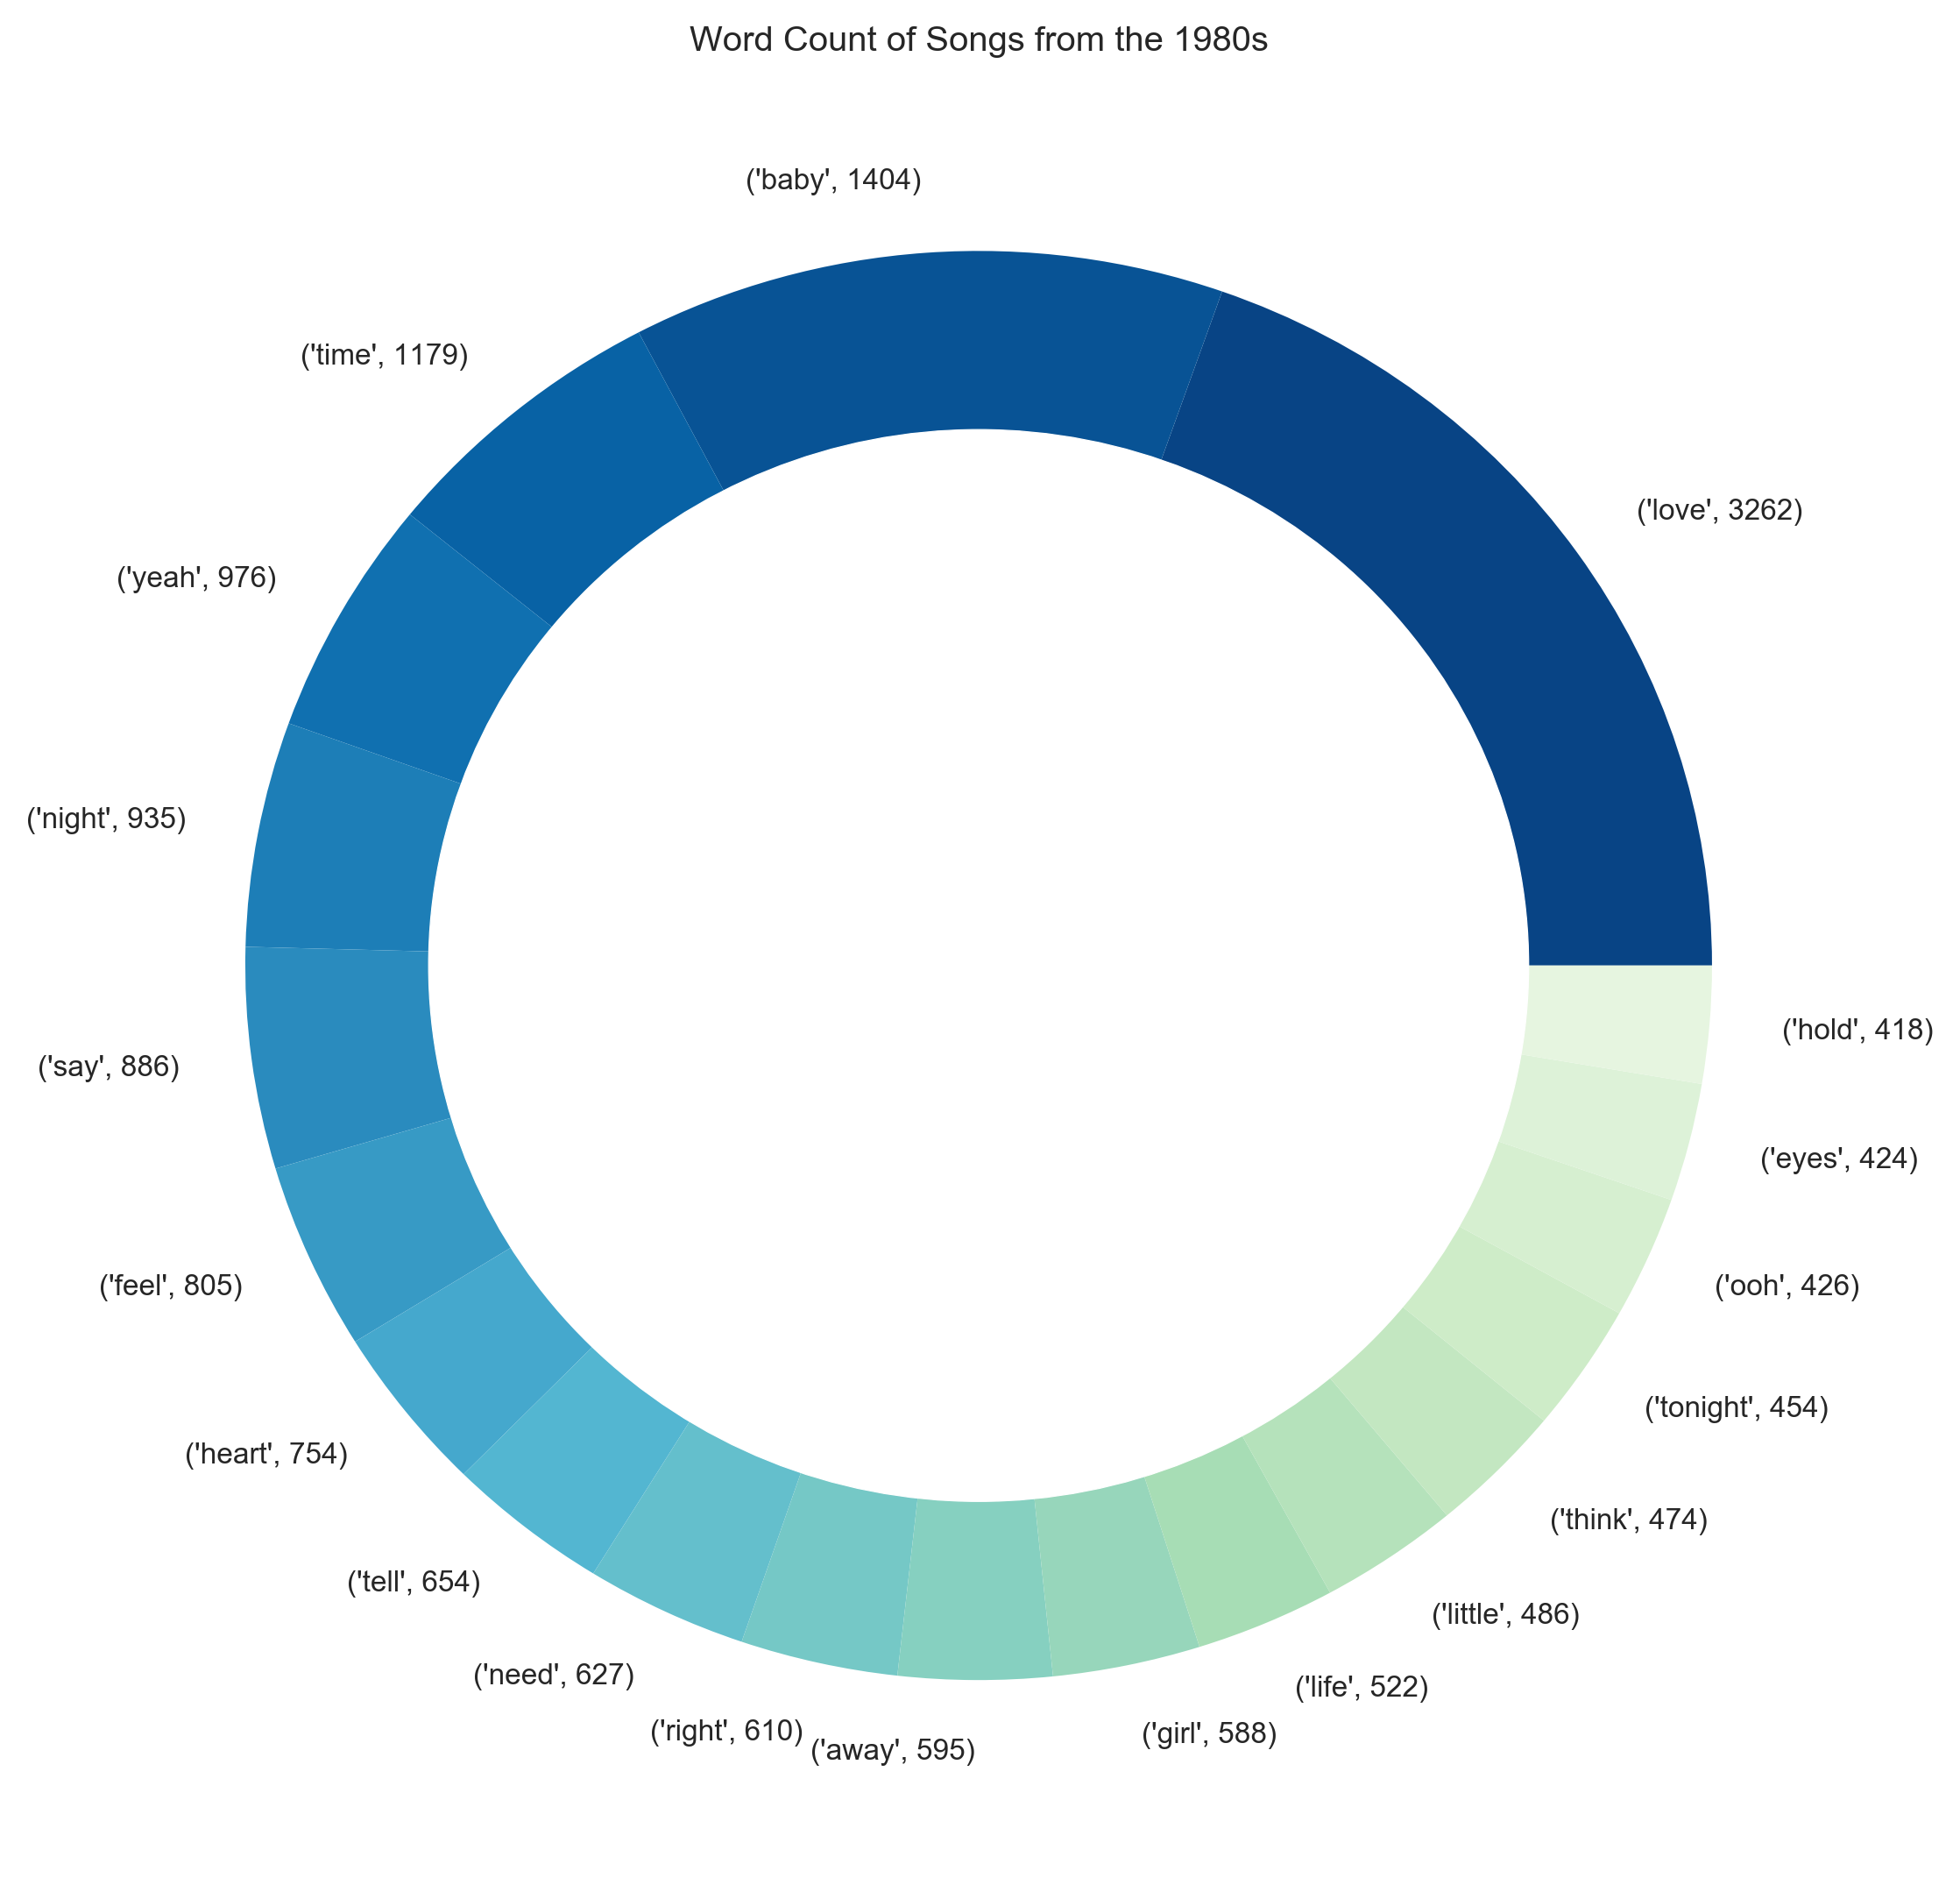

In [820]:
plot_donut(words3, count3, 1980)

----

## 1990-2000

In [821]:
decade4lyrics = lyrics[lyrics['Year'].between(1990, 1999, inclusive=True)]['Lyrics'].values
decade4lyrics = [i for i in decade4lyrics if type(i) == str]

count_vec4 = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
cv4 = count_vec3.fit_transform(decade4lyrics)
cv_fn4 = count_vec3.get_feature_names()

decade4LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=45, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv4)

show_sk_topics(decade4LDA, cv_fn4, 15)

Topic 0:
love baby heart time need feel say right tell life away girl world night hold
Topic 1:
da bad feel mind sweet wants night touch home kiss things fly does new gone
Topic 2:
little days long hey bit coming think yeah time night going say doo turn day
Topic 3:
na la alright da tu cuerpo alegria que macarena nah di diggin bye se rush
Topic 4:
ya ride em yall jam yo roll shit niggaz nigga rock wit jump dat kick
Topic 5:
yeah baby body girl man better gotta really dance say boy day need seen time


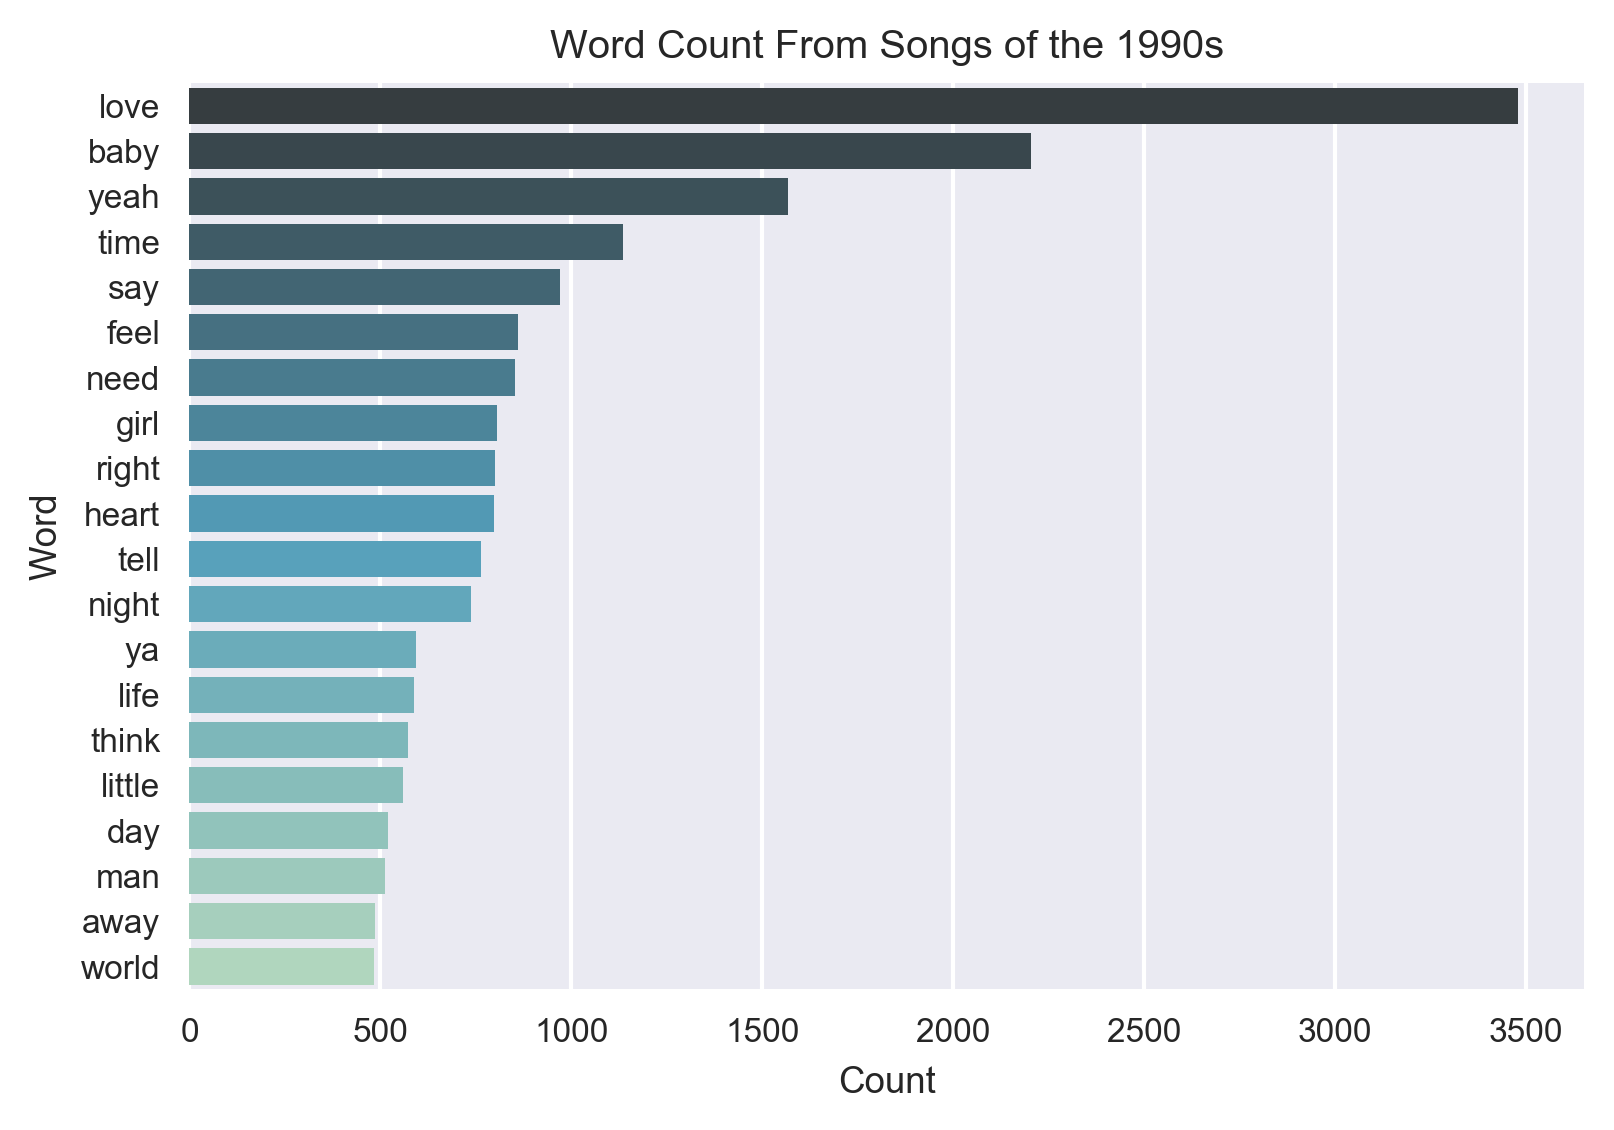

In [822]:
words4, count4 = top_20_words(cv4, cv_fn4)
plot_top_20(words4, count4, 1990)

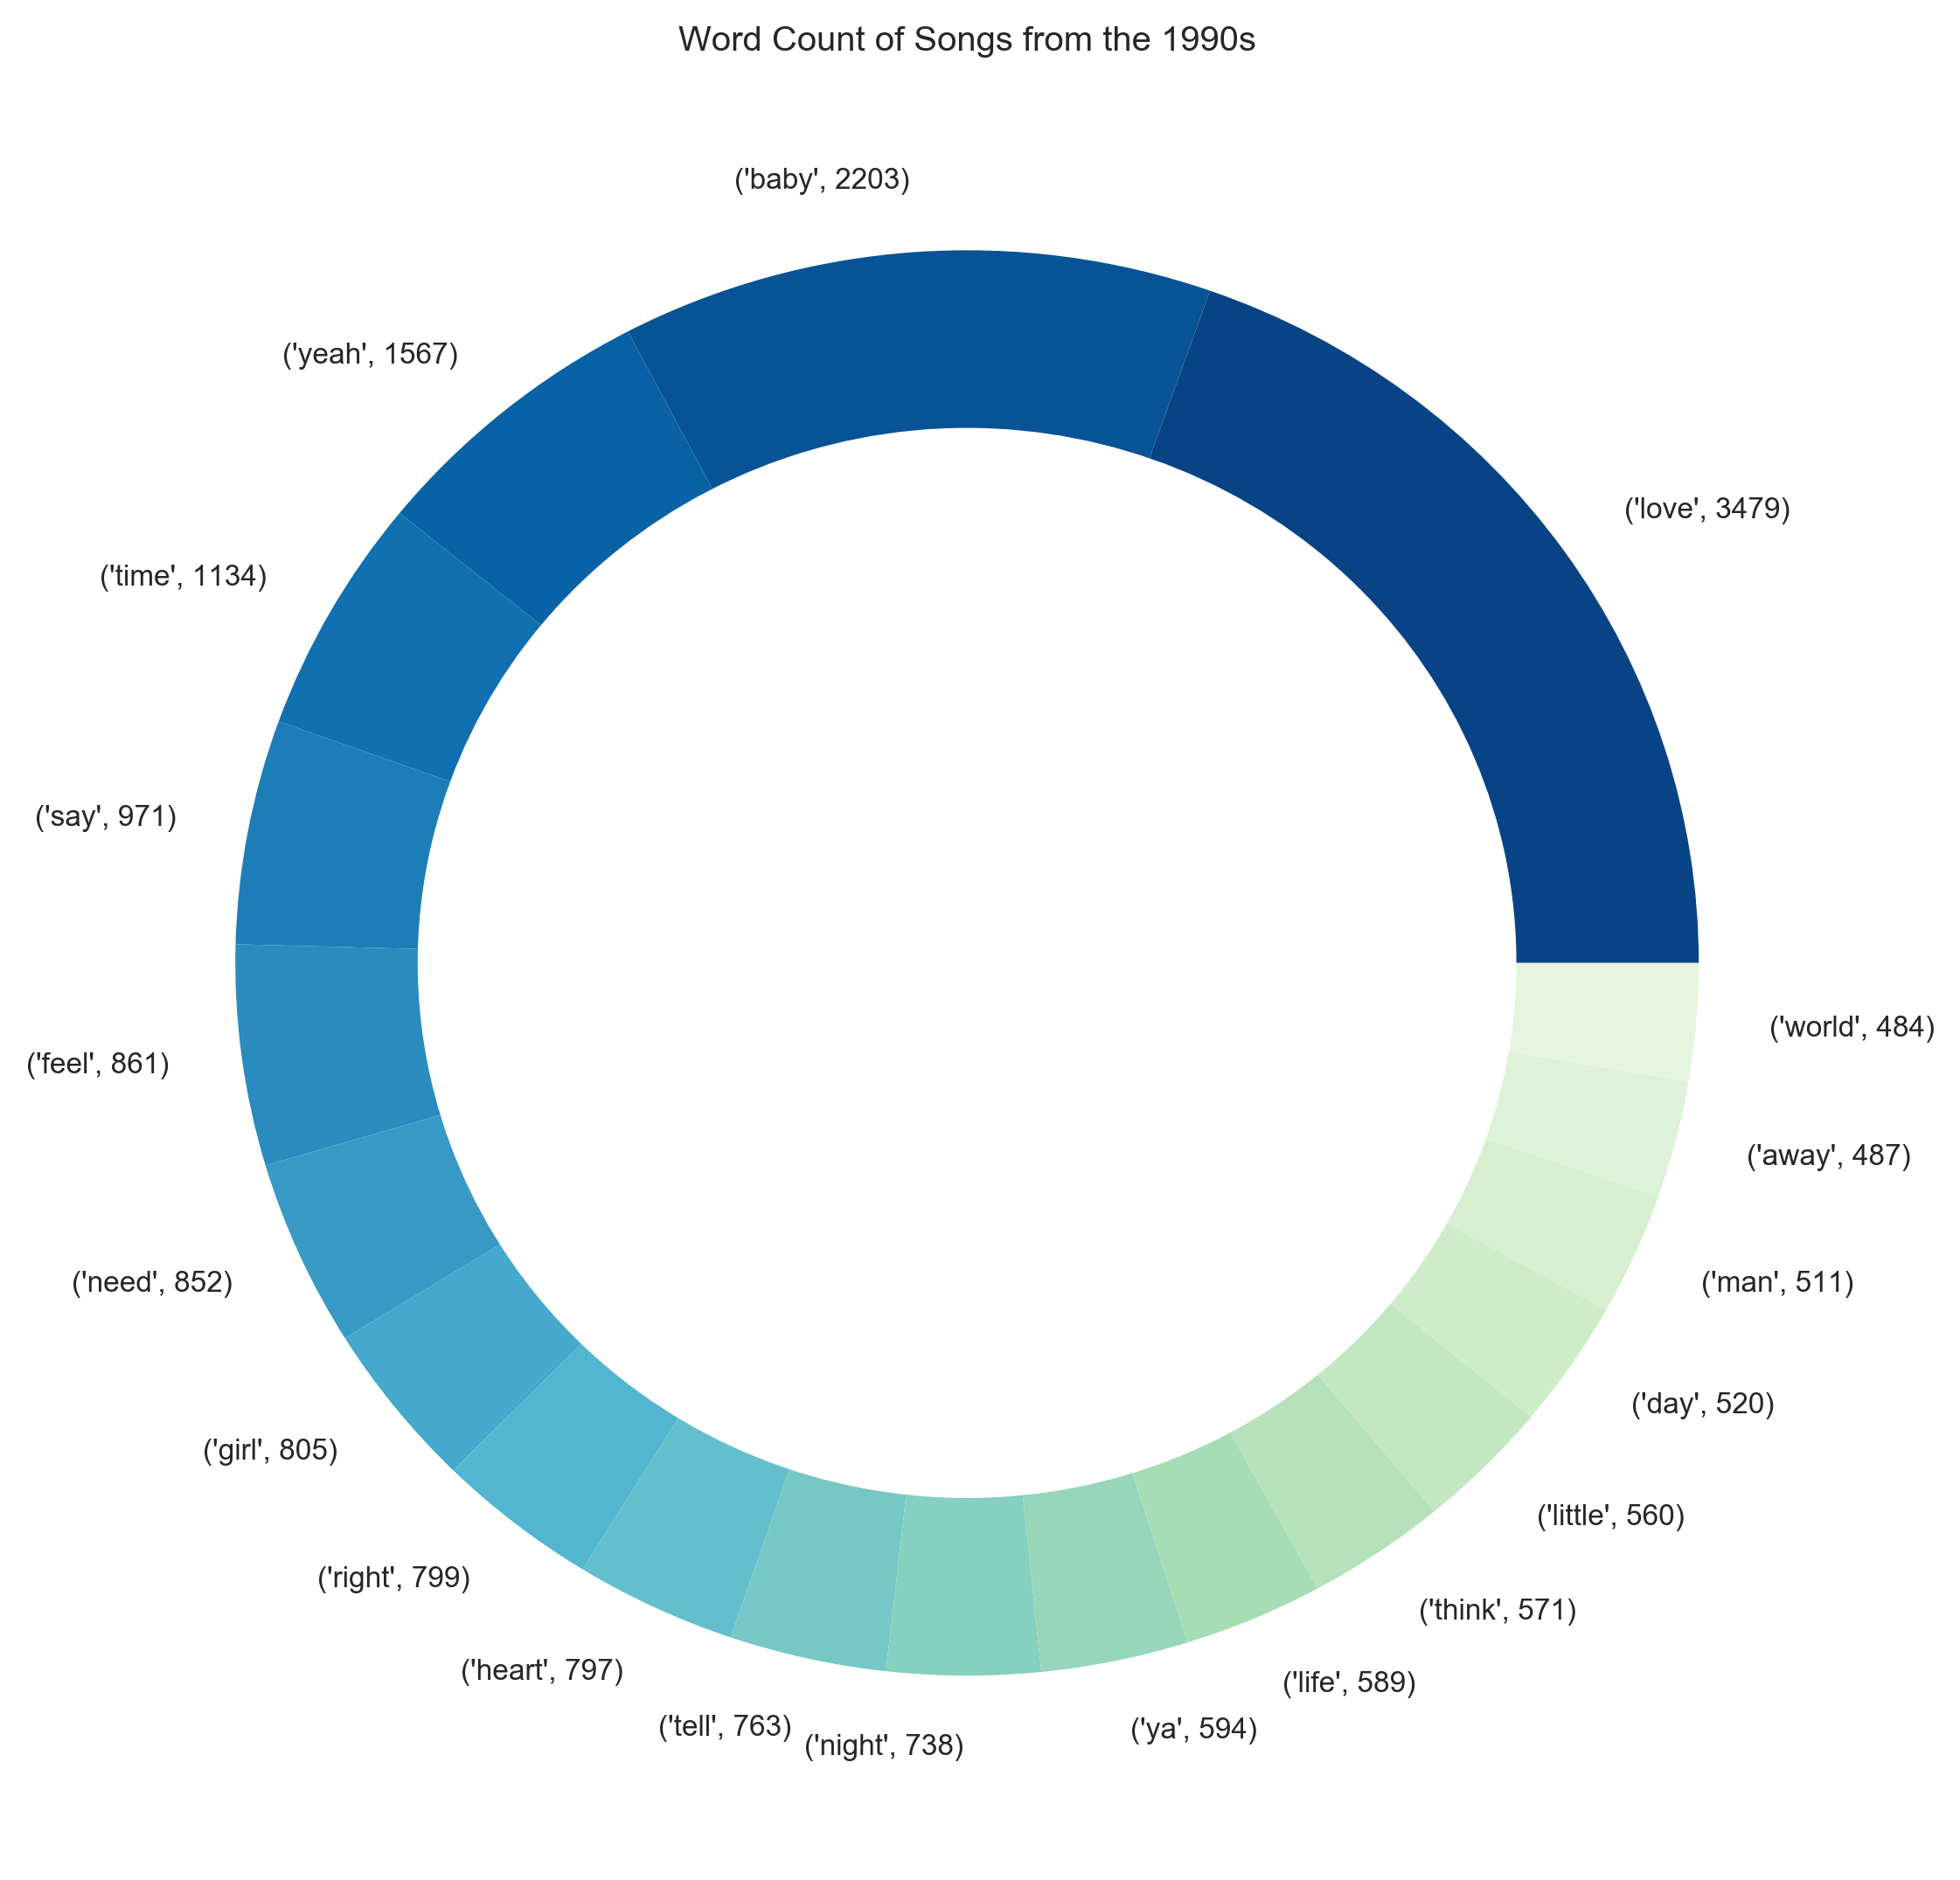

In [823]:
plot_donut(words4, count4, 1990)

In [824]:
NMF_topics(decade4lyrics, 10, 15)

Topic 0:
time say away think said life believe day change feel remember wrong world try stay
Topic 1:
na murderer nah rush di uhh hm lovely nana stepper lyrical gangster eh hmm justified
Topic 2:
love forever believe real hurt knew better right falling true alright changes dream goes ready
Topic 3:
baby gotta tonight wants babe body ooh boy til ecstasy hurt work minute sweet cuz
Topic 4:
yeah ah ooh doing hey crazy time feel tell saying dance repeat everybody funky god
Topic 5:
ya man shit yo little big gotta play yall niggaz money rock ride hit nigga
Topic 6:
da di set slam la lovely boys words everybody dee ii eh jumps boyz dance
Topic 7:
need girl man tell kind live life lover right look yes really leave think true
Topic 8:
night hold talk dream feel saw close miss sweet right heaven tight angel day eyes
Topic 9:
heart tell gave hold break turn world does apart door games beat somebody away playin


----
## 2000-2010

In [825]:
decade5lyrics = lyrics[lyrics['Year'].between(2000, 2009, inclusive=True)]['Lyrics'].values
decade5lyrics = [i for i in decade5lyrics if type(i) == str]

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
cv5 = cv.fit_transform(decade5lyrics)
cv_fn5 = cv.get_feature_names()

decade5LDA = LatentDirichletAllocation(n_components=6, 
                                       batch_size=40, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv5)

show_sk_topics(decade5LDA, cv_fn5, 15)

Topic 0:
ya wit shit em yo club nigga hot ass gon boy stop man yeah big
Topic 1:
walk night lose rain alright fly better lonely hard tonight gone away mind sun people
Topic 2:
la say turn head shake gone rock long song said yeah party hands light right
Topic 3:
love time life say feel away heart right think world gotta things tell baby said
Topic 4:
baby girl love yeah need right hey ooh tell uh night think dance ride man
Topic 5:
na da ay ha bum bay ba wee boom hey eh ya work clean hump


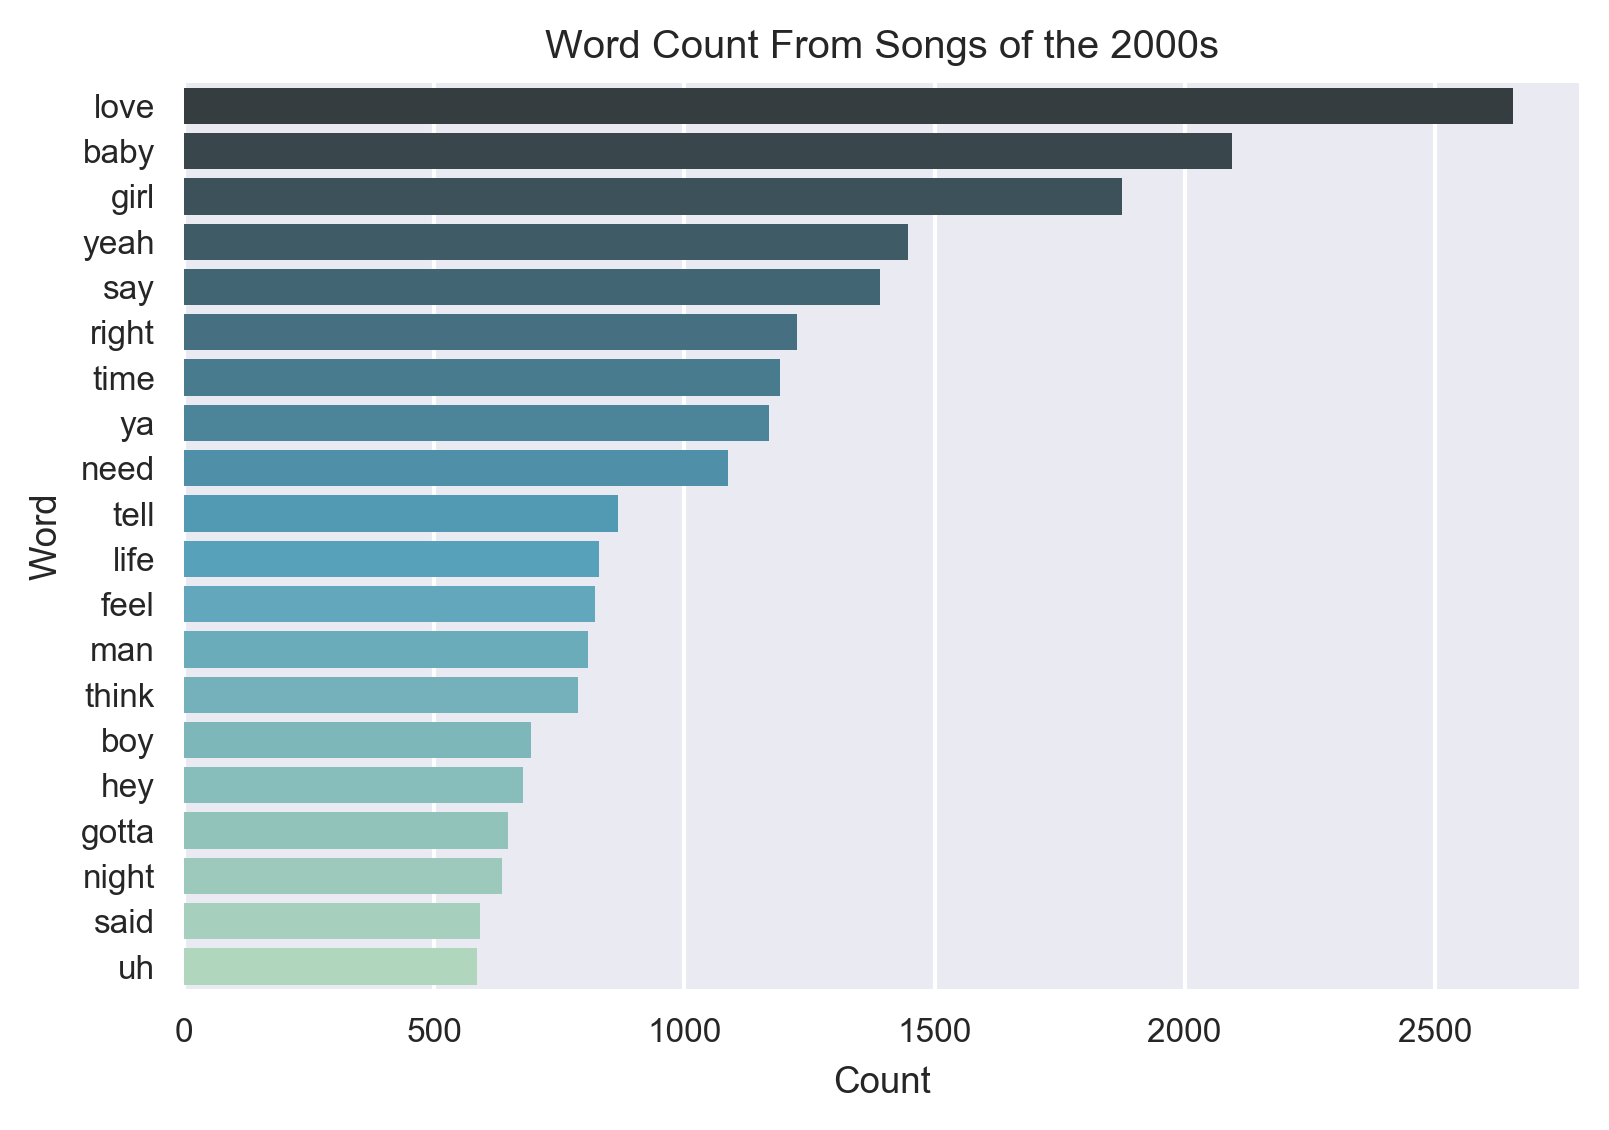

In [826]:
words5, count5 = top_20_words(cv5, cv_fn5)
plot_top_20(words5, count5, 2000)

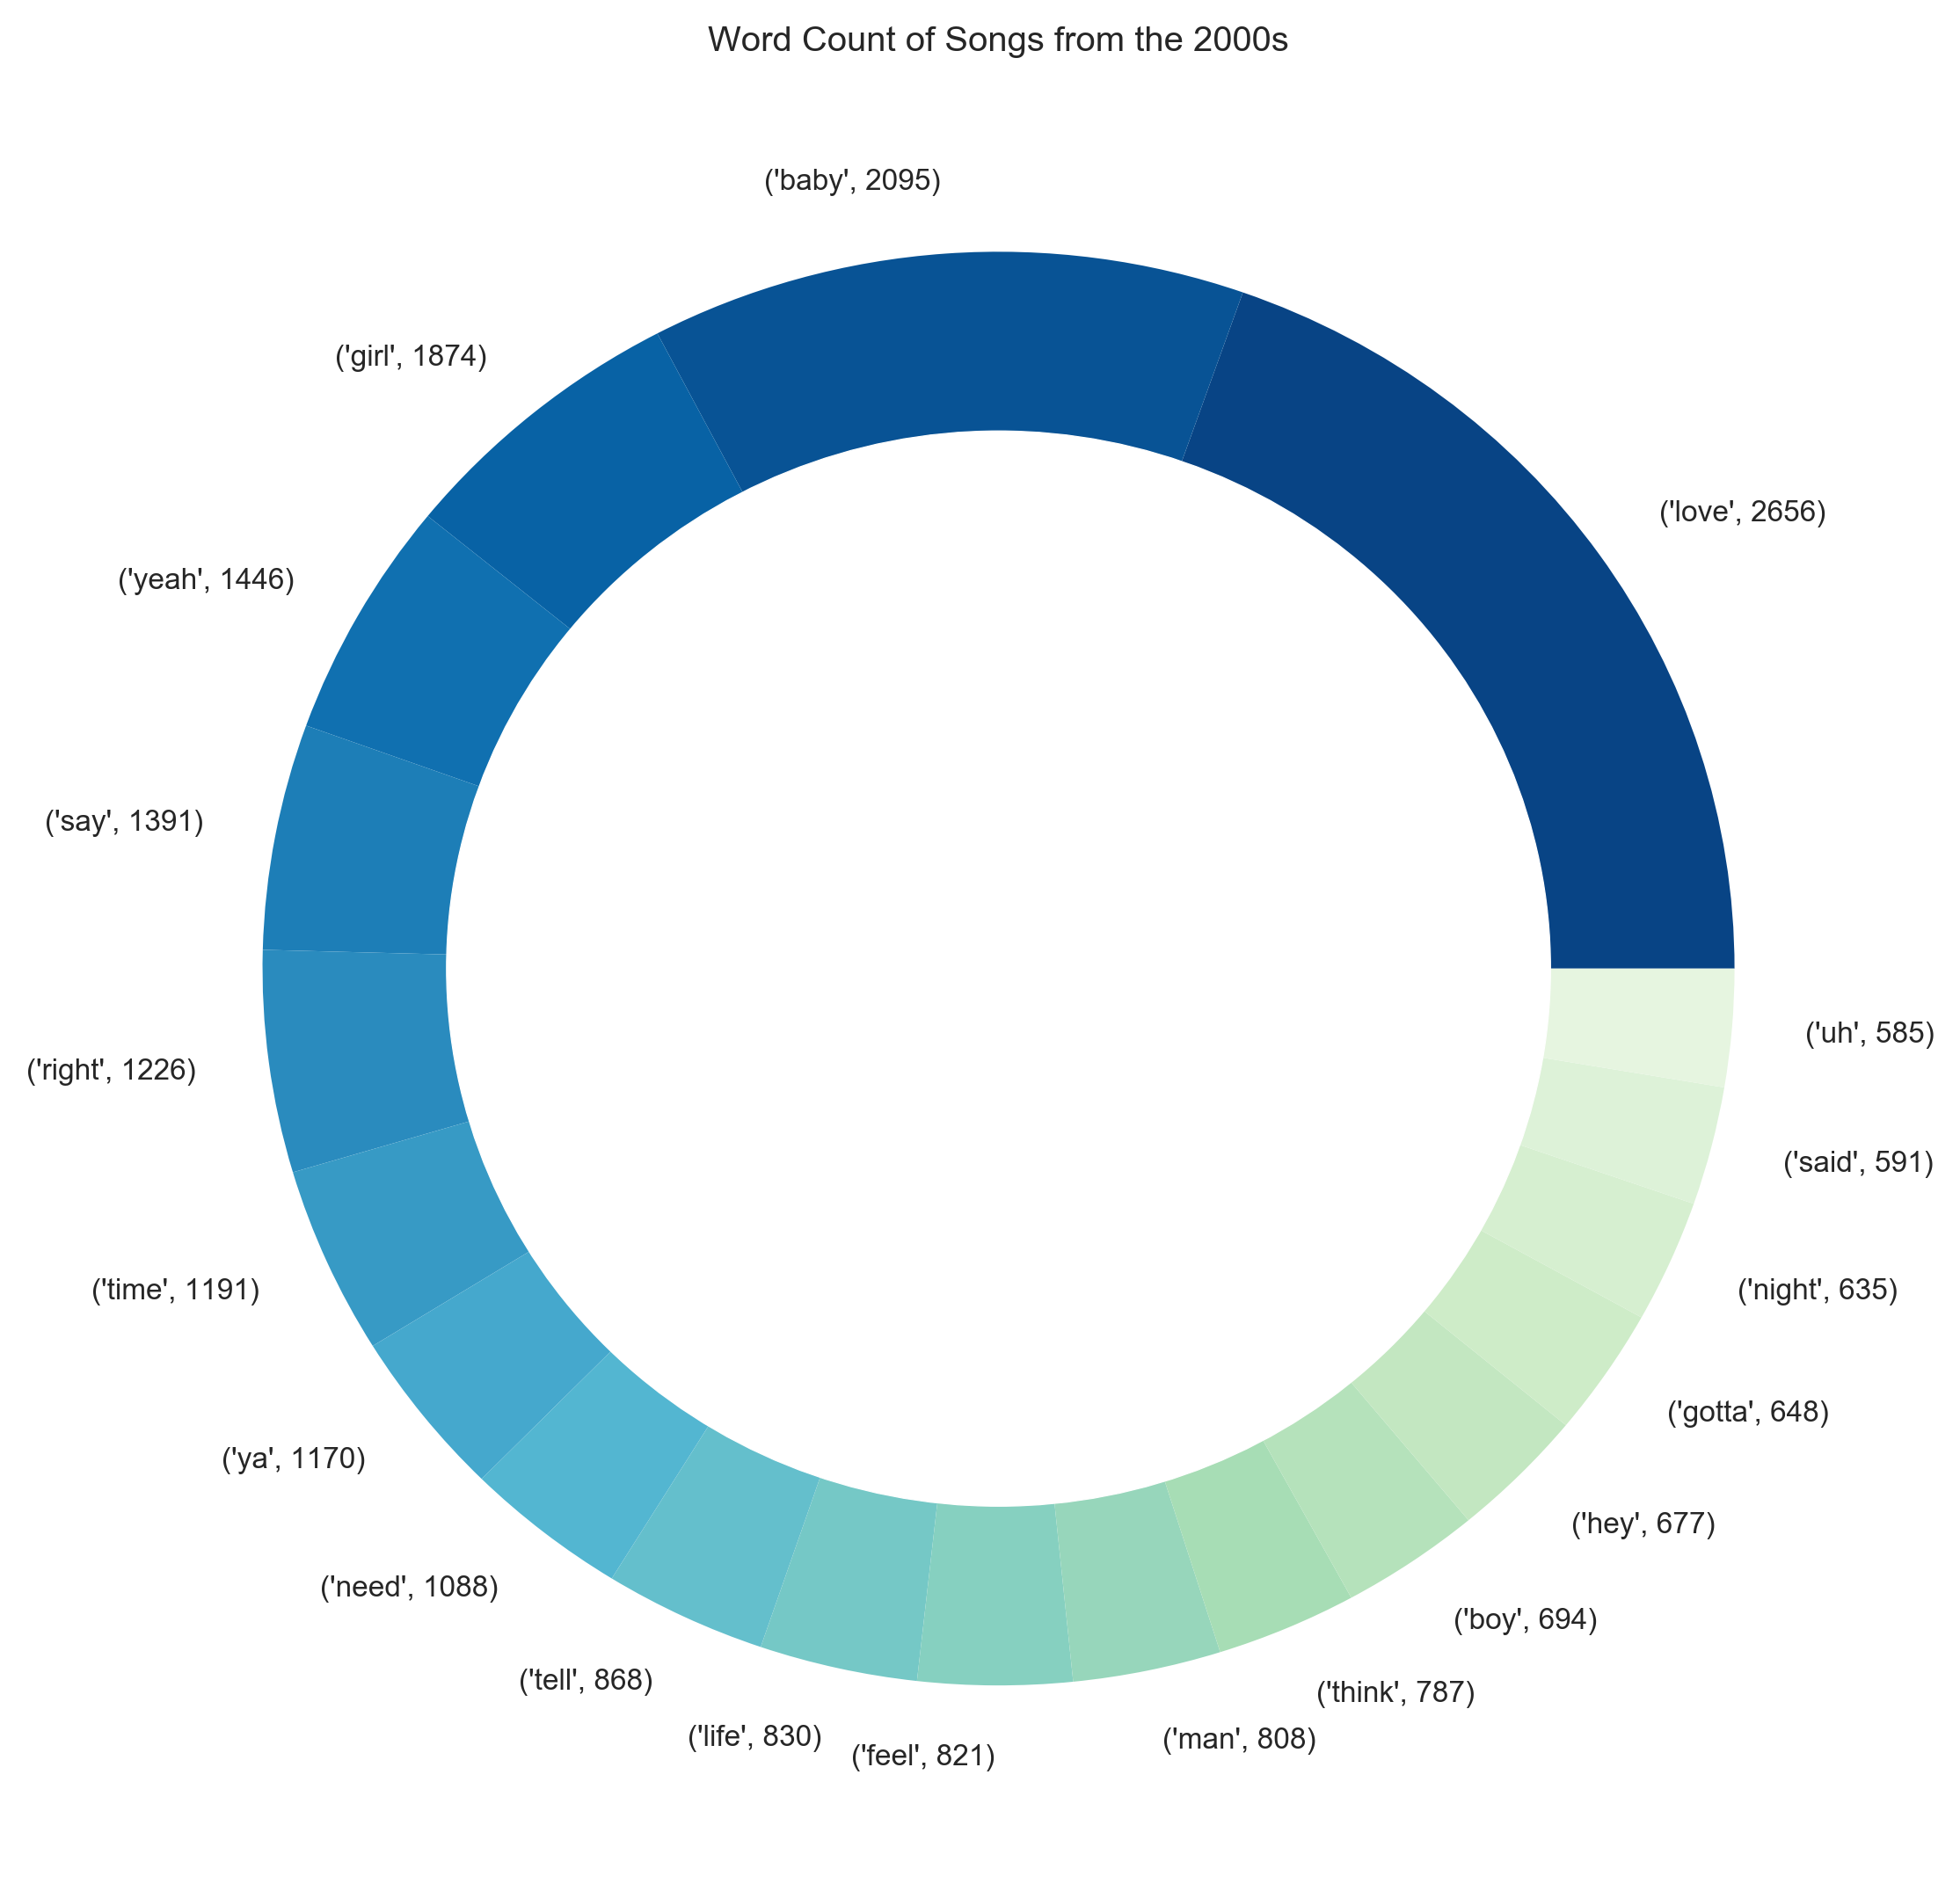

In [827]:
plot_donut(words5, count5, 2000)

----
## 2010-2015

In [828]:
recent_lyrics = lyrics[lyrics['Year'].between(2010, 2015, inclusive=True)]['Lyrics'].values
recent_lyrics = [i for i in recent_lyrics if type(i) == str]

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop)
cv6 = cv.fit_transform(recent_lyrics)
cv_fn6 = cv.get_feature_names()

recent_LDA = LatentDirichletAllocation(n_components=10, 
                                       batch_size=75, 
                                       learning_decay=.7,
                                       max_iter=30,
                                       learning_method='online').fit(cv6)
show_sk_topics(recent_LDA, cv_fn6, 15)

Topic 0:
low rack op gangnam coco city style bitch hear lady hey quan oppa yes sexy
Topic 1:
hitta whoa clap magic demons feel bring new aaaaohohhhhh aaaaaaaohohohoh drag age tu tonights international
Topic 2:
watch bottoms look touch ya turn ooh bang say cake throw hands drank counting problem
Topic 3:
la yeah money em night girl fuck nigga shit tell bitch right real niggas better
Topic 4:
na ooh aah deep wish love right place remind girl say met hopeless rolling chains
Topic 5:
eh yo fly post tie girls feelin gimme rule que hands wit ride sin ooh
Topic 6:
hey bout run bass better kids miss belong summertime treble smack gone yeah ho highway
Topic 7:
baby love yeah girl shake rock tonight night turn hands body stop boom lights party
Topic 8:
lie wiggle girl sexy look animals say bad yeah bye rumor lips moving hoe waitin
Topic 9:
love need time baby yeah feel say tell heart right life away think hard ooh


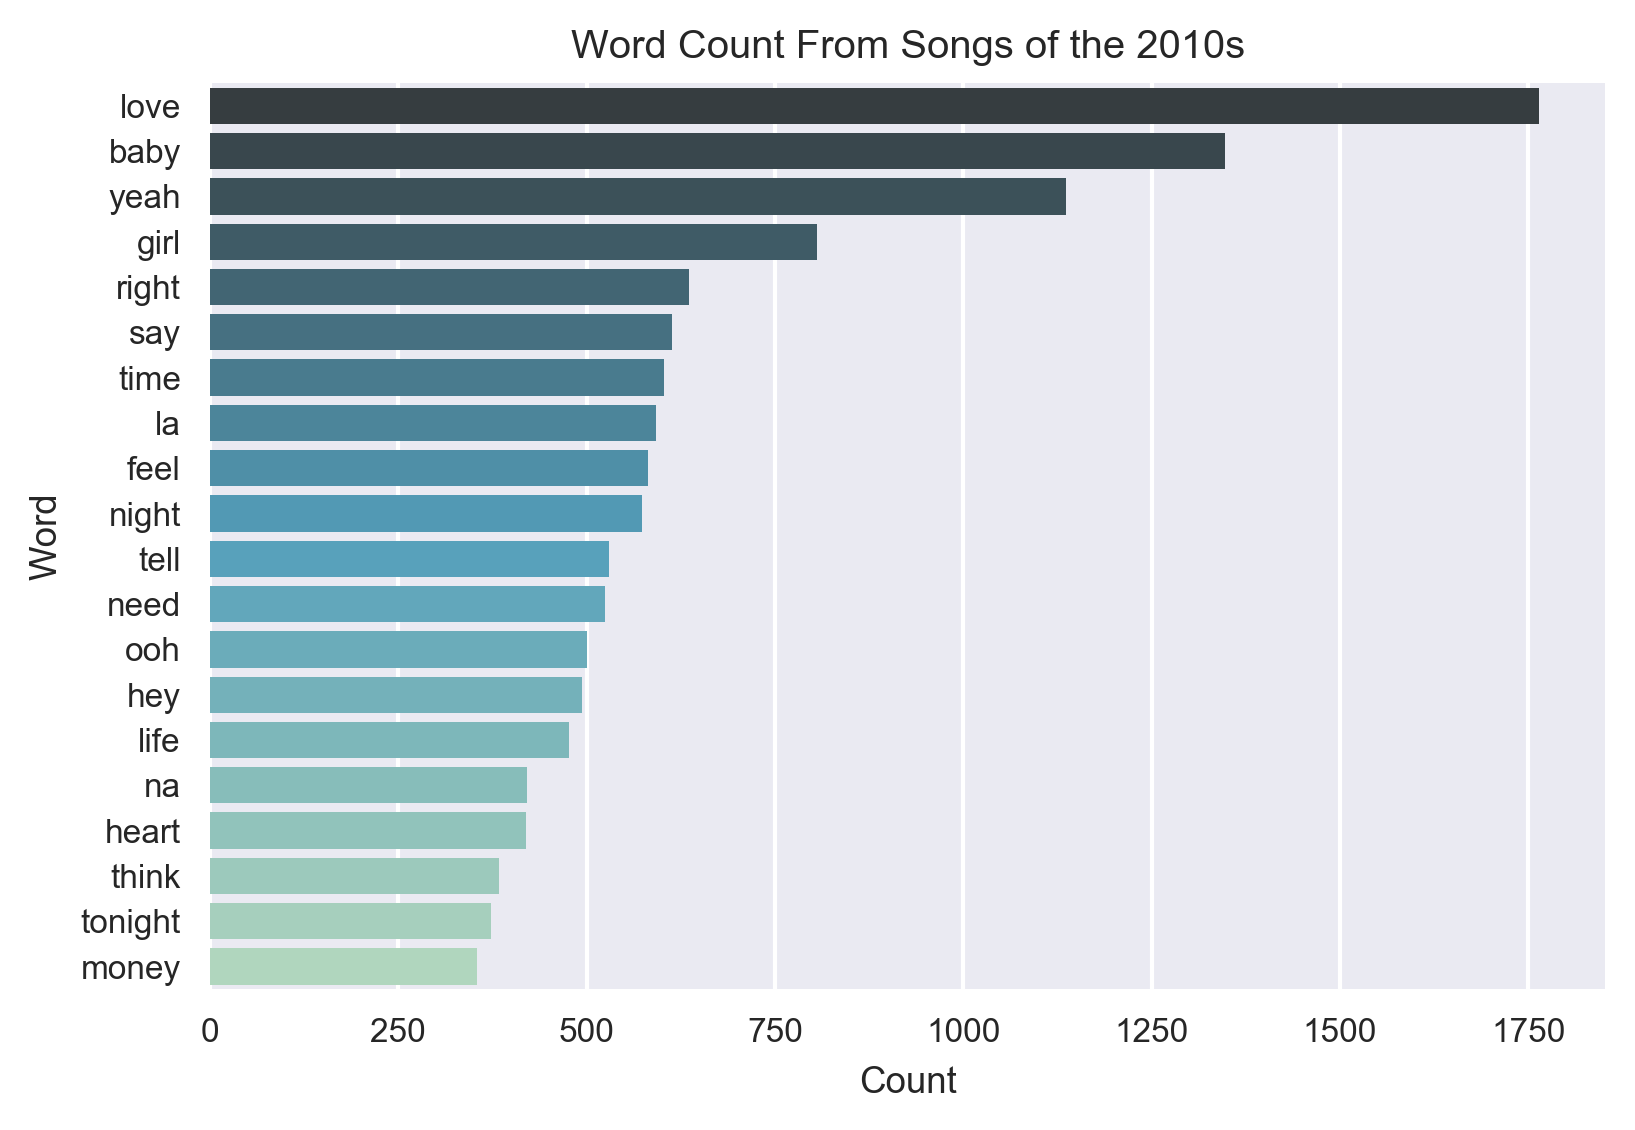

In [829]:
words6, count6 = top_20_words(cv6, cv_fn6)
plot_top_20(words6, count6, 2010)

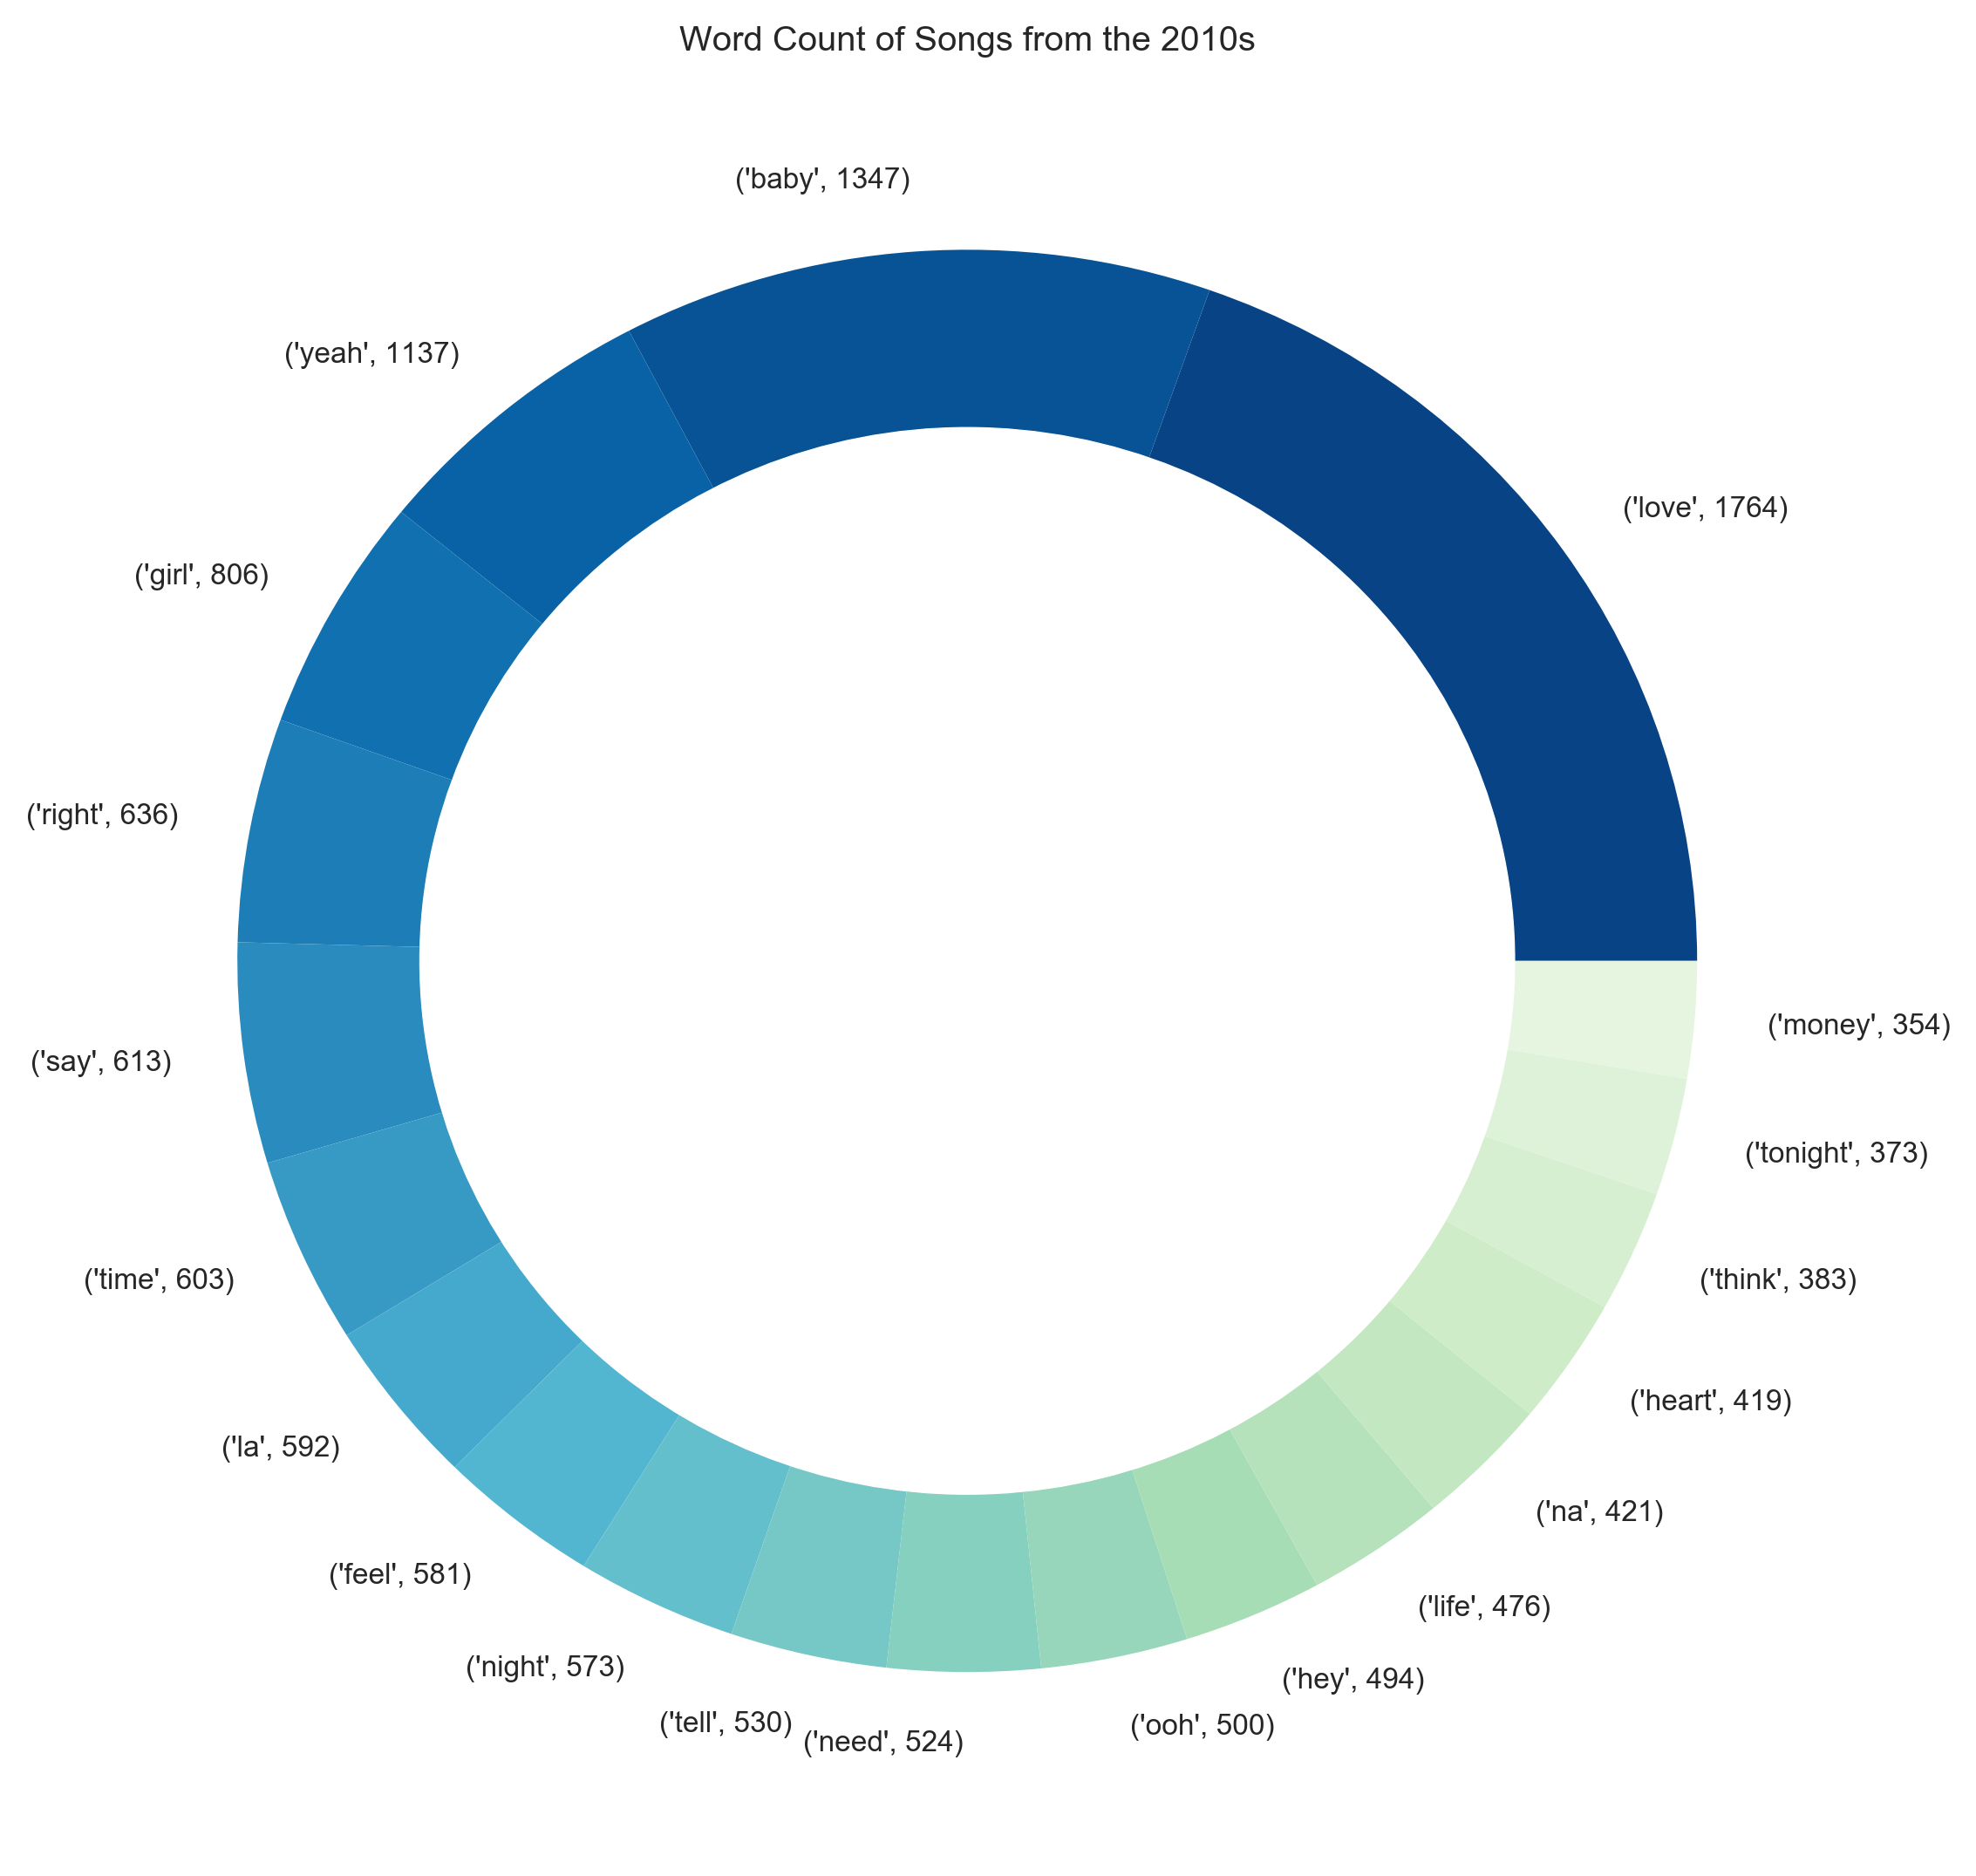

In [830]:
plot_donut(words6, count6, 2010)

# The frequency of different words across each year

In [13]:
removed_null_lyrics = lyrics[lyrics['Lyrics'].notnull()]

tokens = []
for i in removed_null_lyrics['Lyrics']:
    tokens.append([word.lower() for sent in nltk.sent_tokenize(i) for word in nltk.word_tokenize(sent)])

removed_null_lyrics['Tokenized Lyrics'] = tokens

for_indexing =[]
for i in  removed_null_lyrics['Tokenized Lyrics'].values:
    if len(i) > 0:
        for_indexing.append(True)
    else:
        for_indexing.append(False)
only_w_lyrics = removed_null_lyrics[for_indexing]

/Users/jasonjiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [14]:
def find_freq(word):
    year_freq_ = {}
    for i in np.arange(1965, 2016):
        counts = 0
        length_song = 0
        lyrics_year = only_w_lyrics[only_w_lyrics['Year'] == i]['Tokenized Lyrics'].values
        for song in lyrics_year:
            counts += np.count_nonzero(np.asarray(song) == word)
            length_song += len(song)
        year_freq[i] = counts / length_song
    return year_freq

def freq_to_df(dict_of_freq):
    year = []
    freq = []
    for yr, f in dict_of_freq.items():
        year.append(yr)
        freq.append(f)
    return pd.DataFrame(data={'Year': year, 'Frequency': freq})[['Year', 'Frequency']]

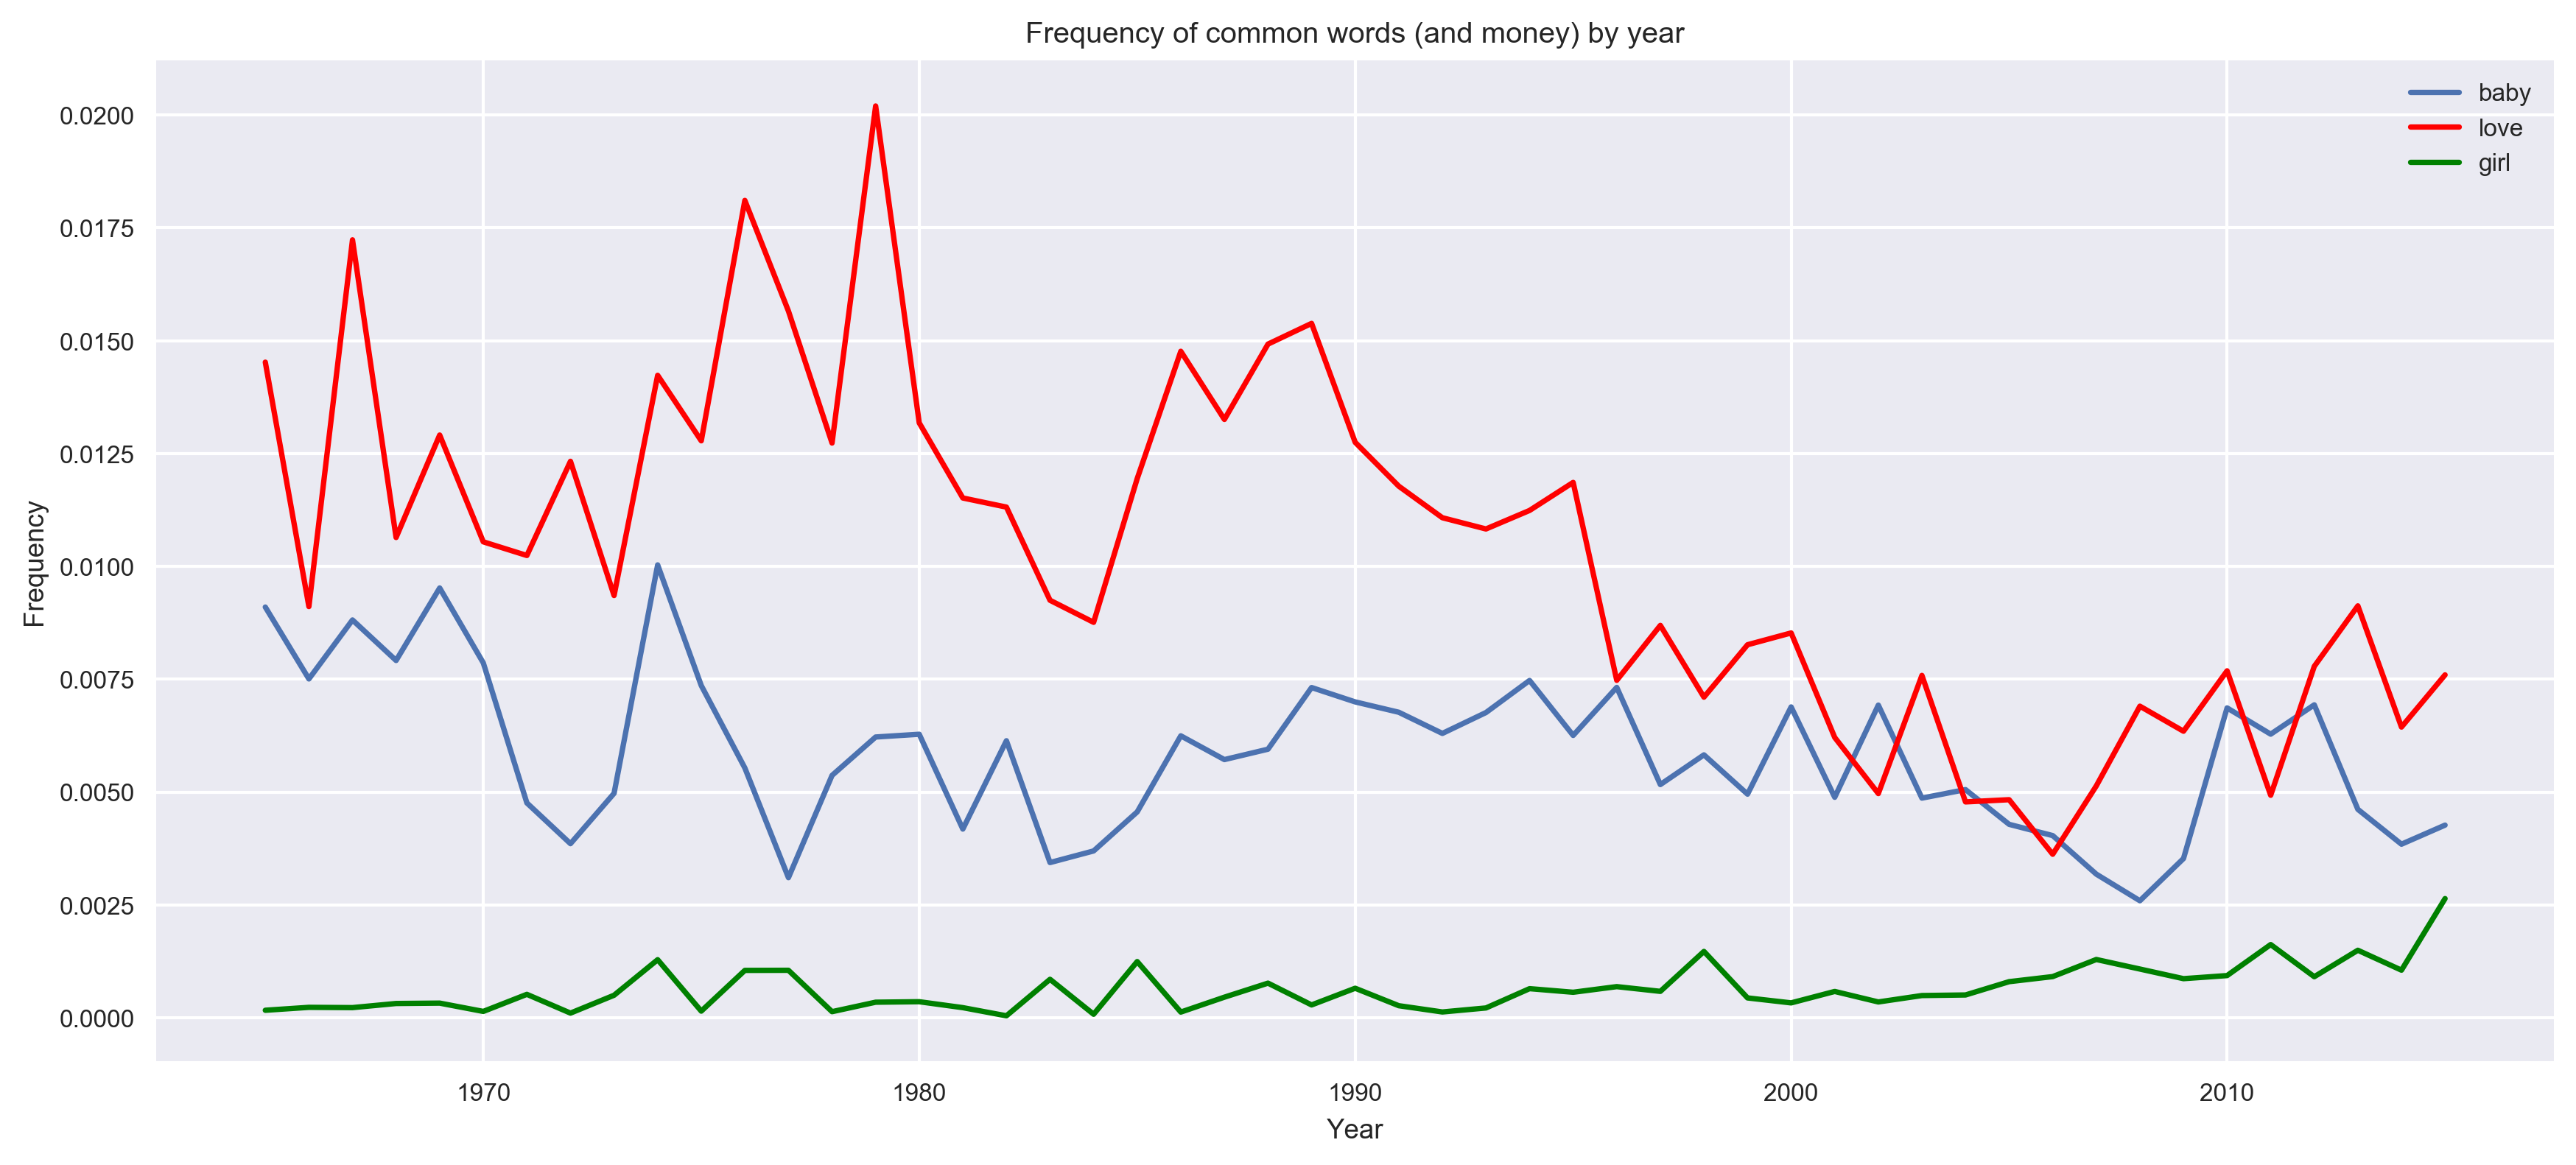

In [833]:
baby_freq = freq_to_df(find_freq('baby'))
love_freq = freq_to_df(find_freq('love'))
money_freq = freq_to_df(find_freq('money'))
plt.figure(dpi=300, figsize=(14, 6));

plt.plot(baby_freq['Year'].values, baby_freq['Frequency'].values)
plt.plot(love_freq['Year'].values, love_freq['Frequency'].values, color='r')
plt.plot(money_freq['Year'].values, money_freq['Frequency'].values, color='g')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Frequency of common words (and money) by year")
plt.legend(['baby', 'love', 'girl'])
plt.show();

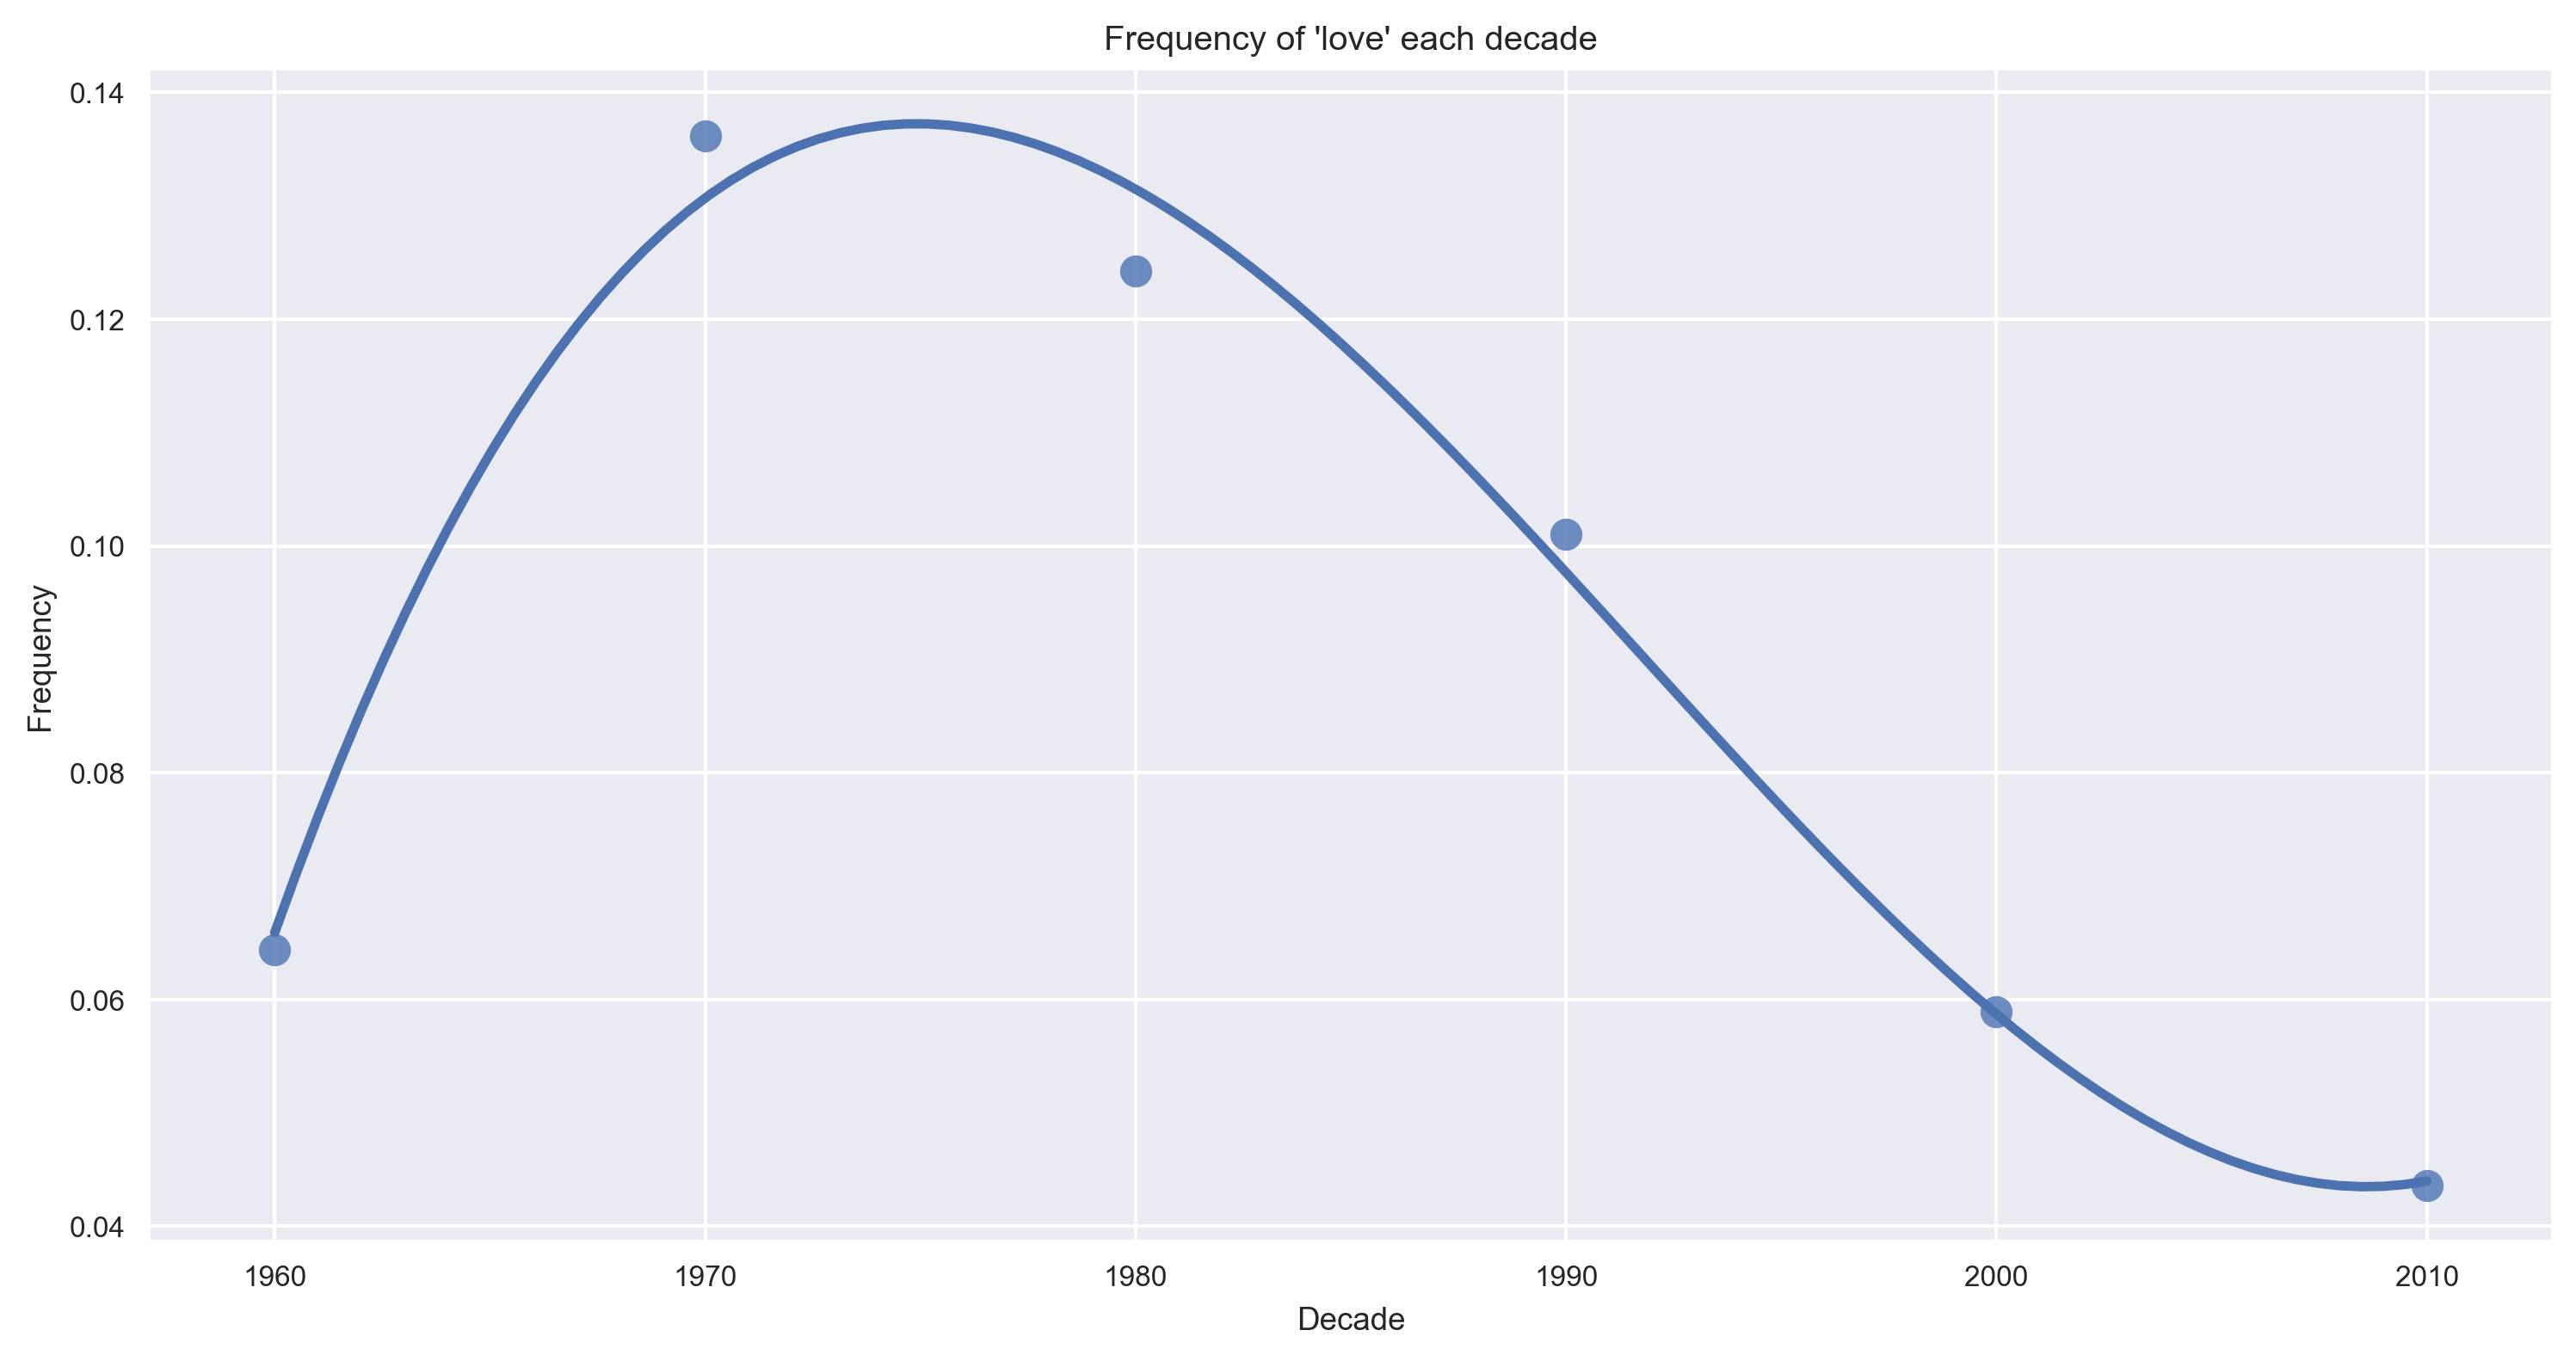

In [834]:
initial = 6
decade_freq = {6:0}
for i in love_freq['Year'].values:
    if i % 100 // 10 != initial:
        initial = i % 100 // 10
        decade_freq[initial] = love_freq[love_freq['Year'] == i]['Frequency'].values[0]
    else:
        decade_freq[initial] = decade_freq[initial] + love_freq[love_freq['Year'] == i]['Frequency'].values[0]

decade = []
freq = []
for k, v in decade_freq.items():
    decade.append(k)
    freq.append(v)
decade = [i * 10 for i in decade]
decade = [i + 1900 for i in decade[:4]] + [i + 2000 for i in decade[4:]]
love_freq_decade = pd.DataFrame(data={'Decade':decade, 'Frequency': freq})

plt.figure(dpi=300, figsize=(12, 6));
plt.title("Frequency of 'love' each decade")
sns.regplot(x='Decade', y='Frequency', data=love_freq_decade,
                scatter_kws={"s": 80},
                order=3, ci=None, truncate=True);

## Have songs become more repetitive?

Using the tokenized lyrics, I'll calculate the number of unique tokens in each songs, and calculate the average for each decade.

In [15]:
def mean_unique(lower, upper):
    num_unique = np.array([])
    for i in only_w_lyrics[only_w_lyrics['Year'].between(lower, upper - 1, inclusive=True)]['Tokenized Lyrics'].values:
        num_unique = np.append(num_unique, len(np.unique(i)))
    return np.mean(num_unique)

In [16]:
decade = np.array([mean_unique(1965, 1970)])
for i in np.arange(1970, 2001, 10):
    decade = np.append(decade, mean_unique(i, i+10))

decade_unique = np.append(decade, mean_unique(2010, 2015+1))

In [17]:
#By year
year_unique = np.array([])
unique_t = np.array([])
for i in np.arange(1965, 2016):
    for i in only_w_lyrics[only_w_lyrics['Year']==i]['Tokenized Lyrics'].values:
        unique_t = np.append(unique_t, len(np.unique(i)))
    year_unique = np.append(year_unique, np.mean(unique_t))
    unique_t = np.array([])

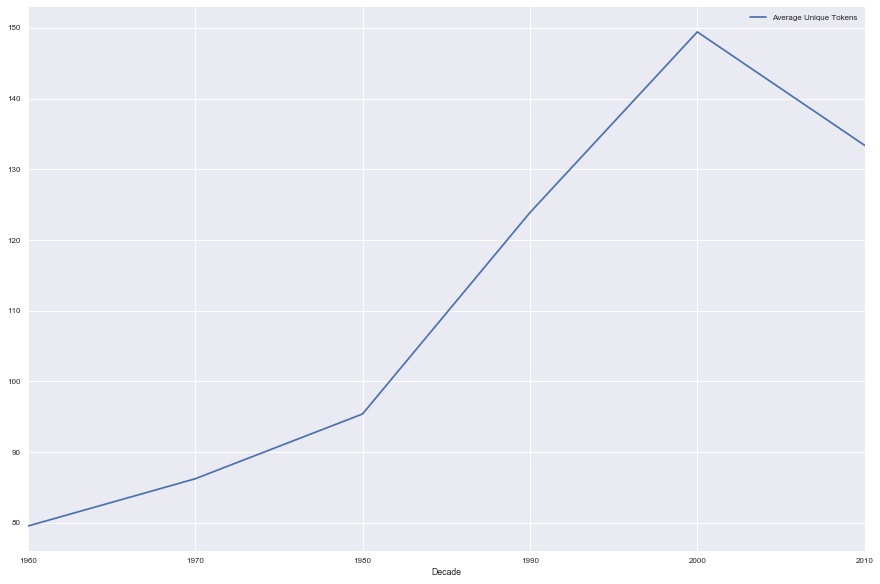

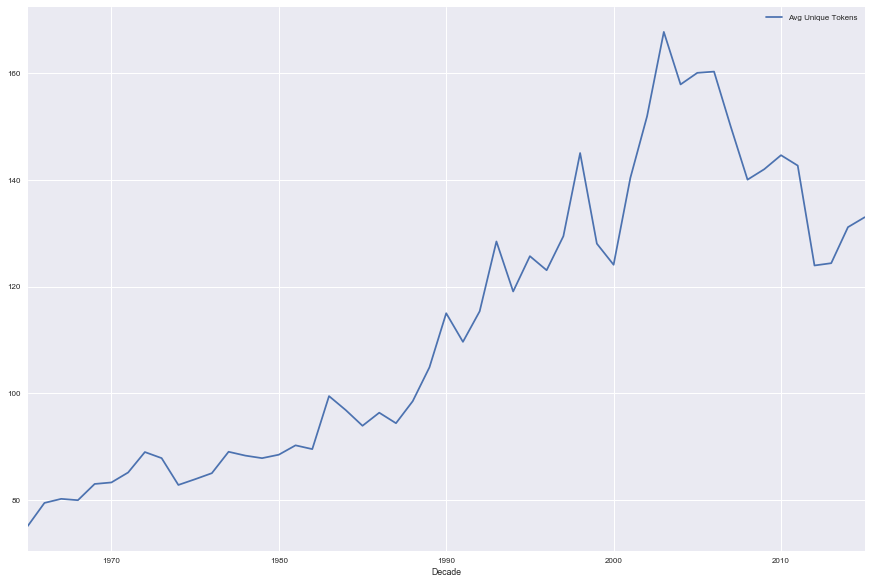

In [892]:
df_d_unique = pd.DataFrame(data={'Decade':np.arange(1960, 2011, 10), "Average Unique Tokens": decade_unique})
df_d_unique.plot(x='Decade', figsize=(15, 10));
df_y_unique = pd.DataFrame(data={'Decade':np.arange(1965, 2016), 'Avg Unique Tokens':year_unique})
df_y_unique.plot(x='Decade', figsize=(15, 10));

## How did Madonna get so many songs on the charts?

In [18]:
madonna = only_w_lyrics[only_w_lyrics['Artist']=='madonna']

In [19]:
vec = TfidfVectorizer(max_df=.95, min_df=2, stop_words=stop)
mv = vec.fit_transform(madonna['Lyrics'].values)
mv_fn = vec.get_feature_names()

In [20]:
madonna_NMF = NMF(n_components=7, init='nndsvd', random_state=1, alpha=.1).fit(mv)

In [21]:
show_sk_topics(madonna_NMF, mv_fn, 15)

Topic 0:
love true baby la say body scared waiting heart deeper feels slip hey right best
Topic 1:
mmm comin somethings babys secret took secretmmm shared understand lies long hand memmm mesomethings learned
Topic 2:
girl world took think day need life time days star wild try truth kept word
Topic 3:
wed baby hearts heart hold lose die watch mind joy point eyes life thought turn
Topic 4:
tell learned live secret man open thousand lies inside till hope stare isnt far rain
Topic 5:
music hey makes flow body mister dance baby starts crazy stop best life goes door
Topic 6:
feel coming prayer home light time ooh loves angel flying hear waiting gone little yeah


In [22]:
cvec = CountVectorizer(max_df=.95, min_df=2, stop_words=stop)
m_cv = cvec.fit_transform(madonna['Lyrics'].values)
mv_cfn = cvec.get_feature_names()

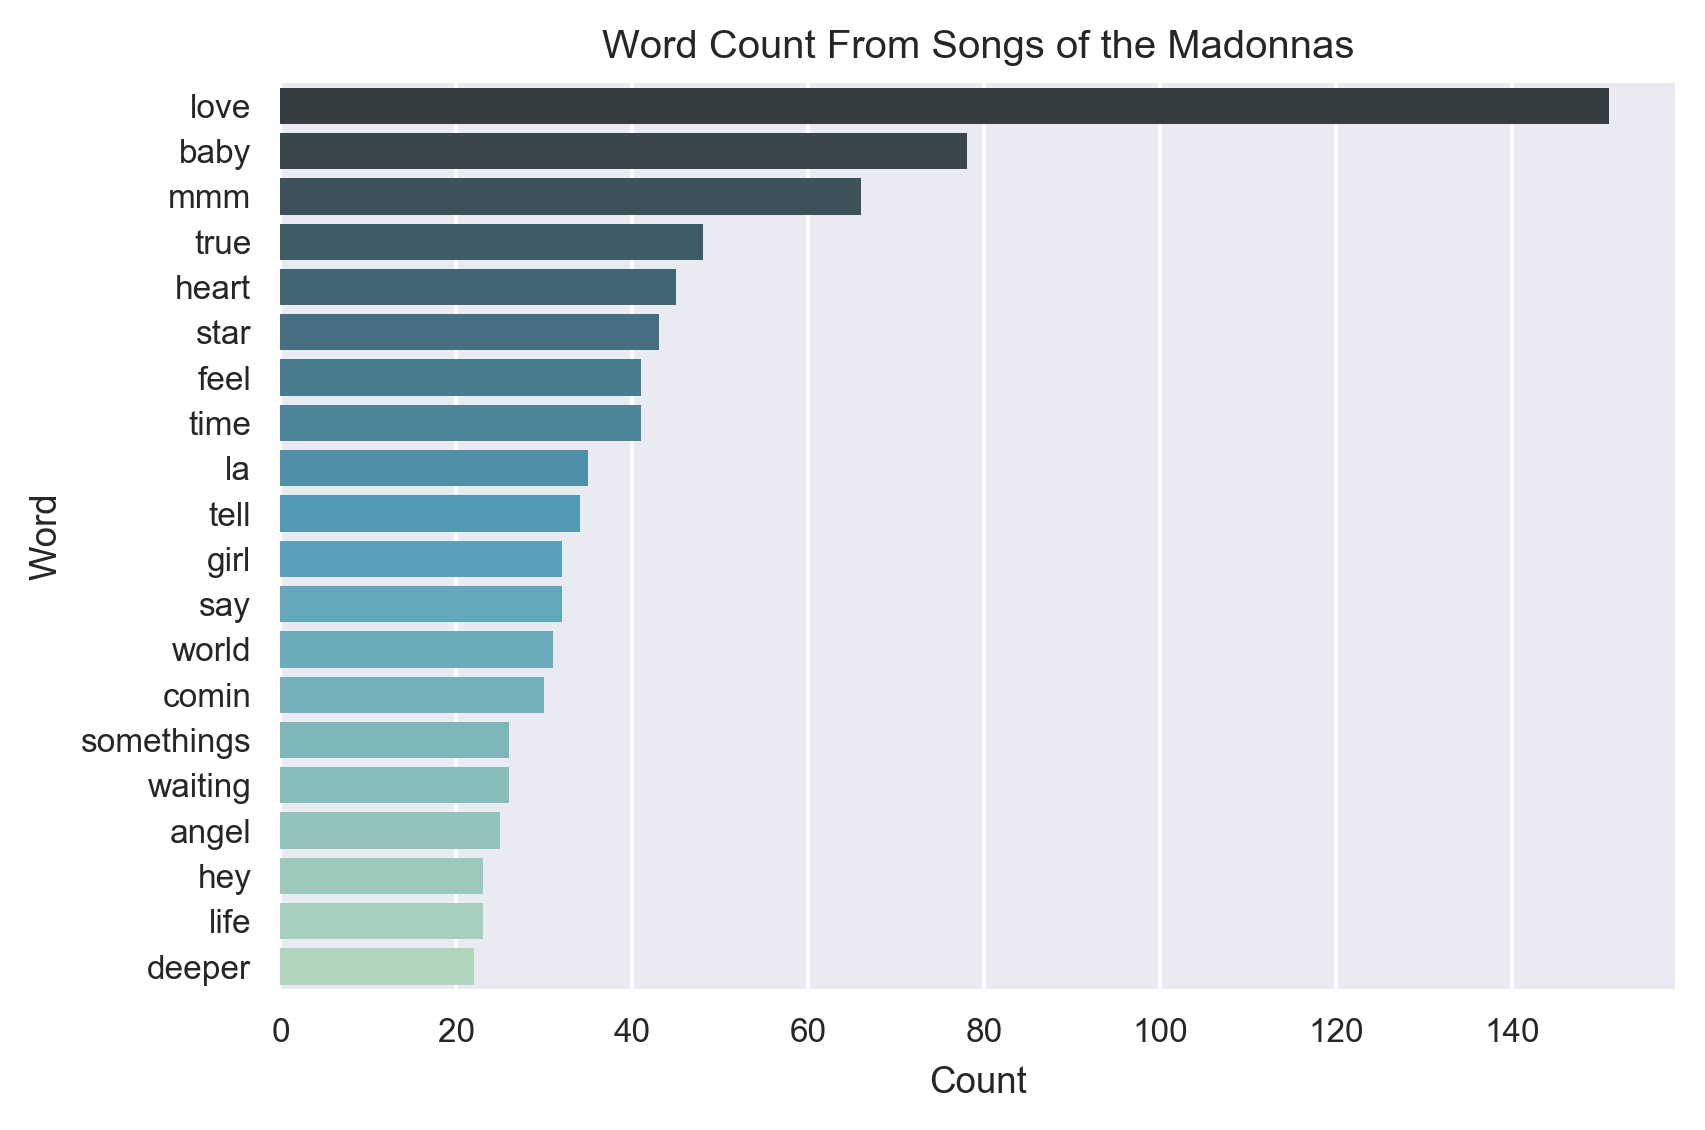

In [23]:
sorted_words = sorted(list(zip(mv_cfn, np.asarray(m_cv.sum(axis=0)).ravel())), 
                               key=lambda x: x[1], reverse=True)
words, count = [i[0] for i in sorted_words], [i[1] for i in sorted_words]
plot_top_20(words, count, 'Madonna')

Overall proportion of 'love' in Madonna's songs compared to the billboard songs overall

In [37]:
in_all = np.array([])
total_len = 0
for i in only_w_lyrics['Tokenized Lyrics'].values:
    in_all = np.append(in_all, np.count_nonzero(np.asarray(i) == 'love'))
    total_len += len(i)

In [38]:
sum(in_all) / total_len

0.009463673562398446

In [26]:
love_madonna = 0
total_len = 0
for i in madonna['Tokenized Lyrics'].values:
    love_madonna += np.count_nonzero(np.asarray(i) == 'love')
    total_len += len(i)
love_madonna / total_len

0.01465308102862688

In [27]:
num_b.index

Index(['madonna', 'elton john', 'mariah carey', 'stevie wonder',
       'janet jackson', 'michael jackson', 'taylor swift', 'whitney houston',
       'rihanna', 'the beatles', 'pink', 'kelly clarkson',
       'the black eyed peas', 'britney spears', 'chicago', 'usher',
       'katy perry', 'rod stewart', 'aretha franklin', 'r kelly'],
      dtype='object', name='Artist')

In [35]:
get_love_freq('madonna')

0.01465308102862688

In [28]:
def get_love_freq(artist):
    artist = only_w_lyrics[only_w_lyrics['Artist']==artist]
    love_count = 0
    total_len = 0
    for i in artist['Tokenized Lyrics'].values:
        love_count += np.count_nonzero(np.asarray(i) == 'love')
        total_len += len(i)
    return love_madonna / total_len

In [39]:
artists_and_overall = ['overall']
artists_and_overall.extend(num_b.index.values.tolist())

In [40]:
top_artist_freq = [sum(in_all) / total_len]
for i in num_b.index:
    top_artist_freq.append(get_love_freq(i))

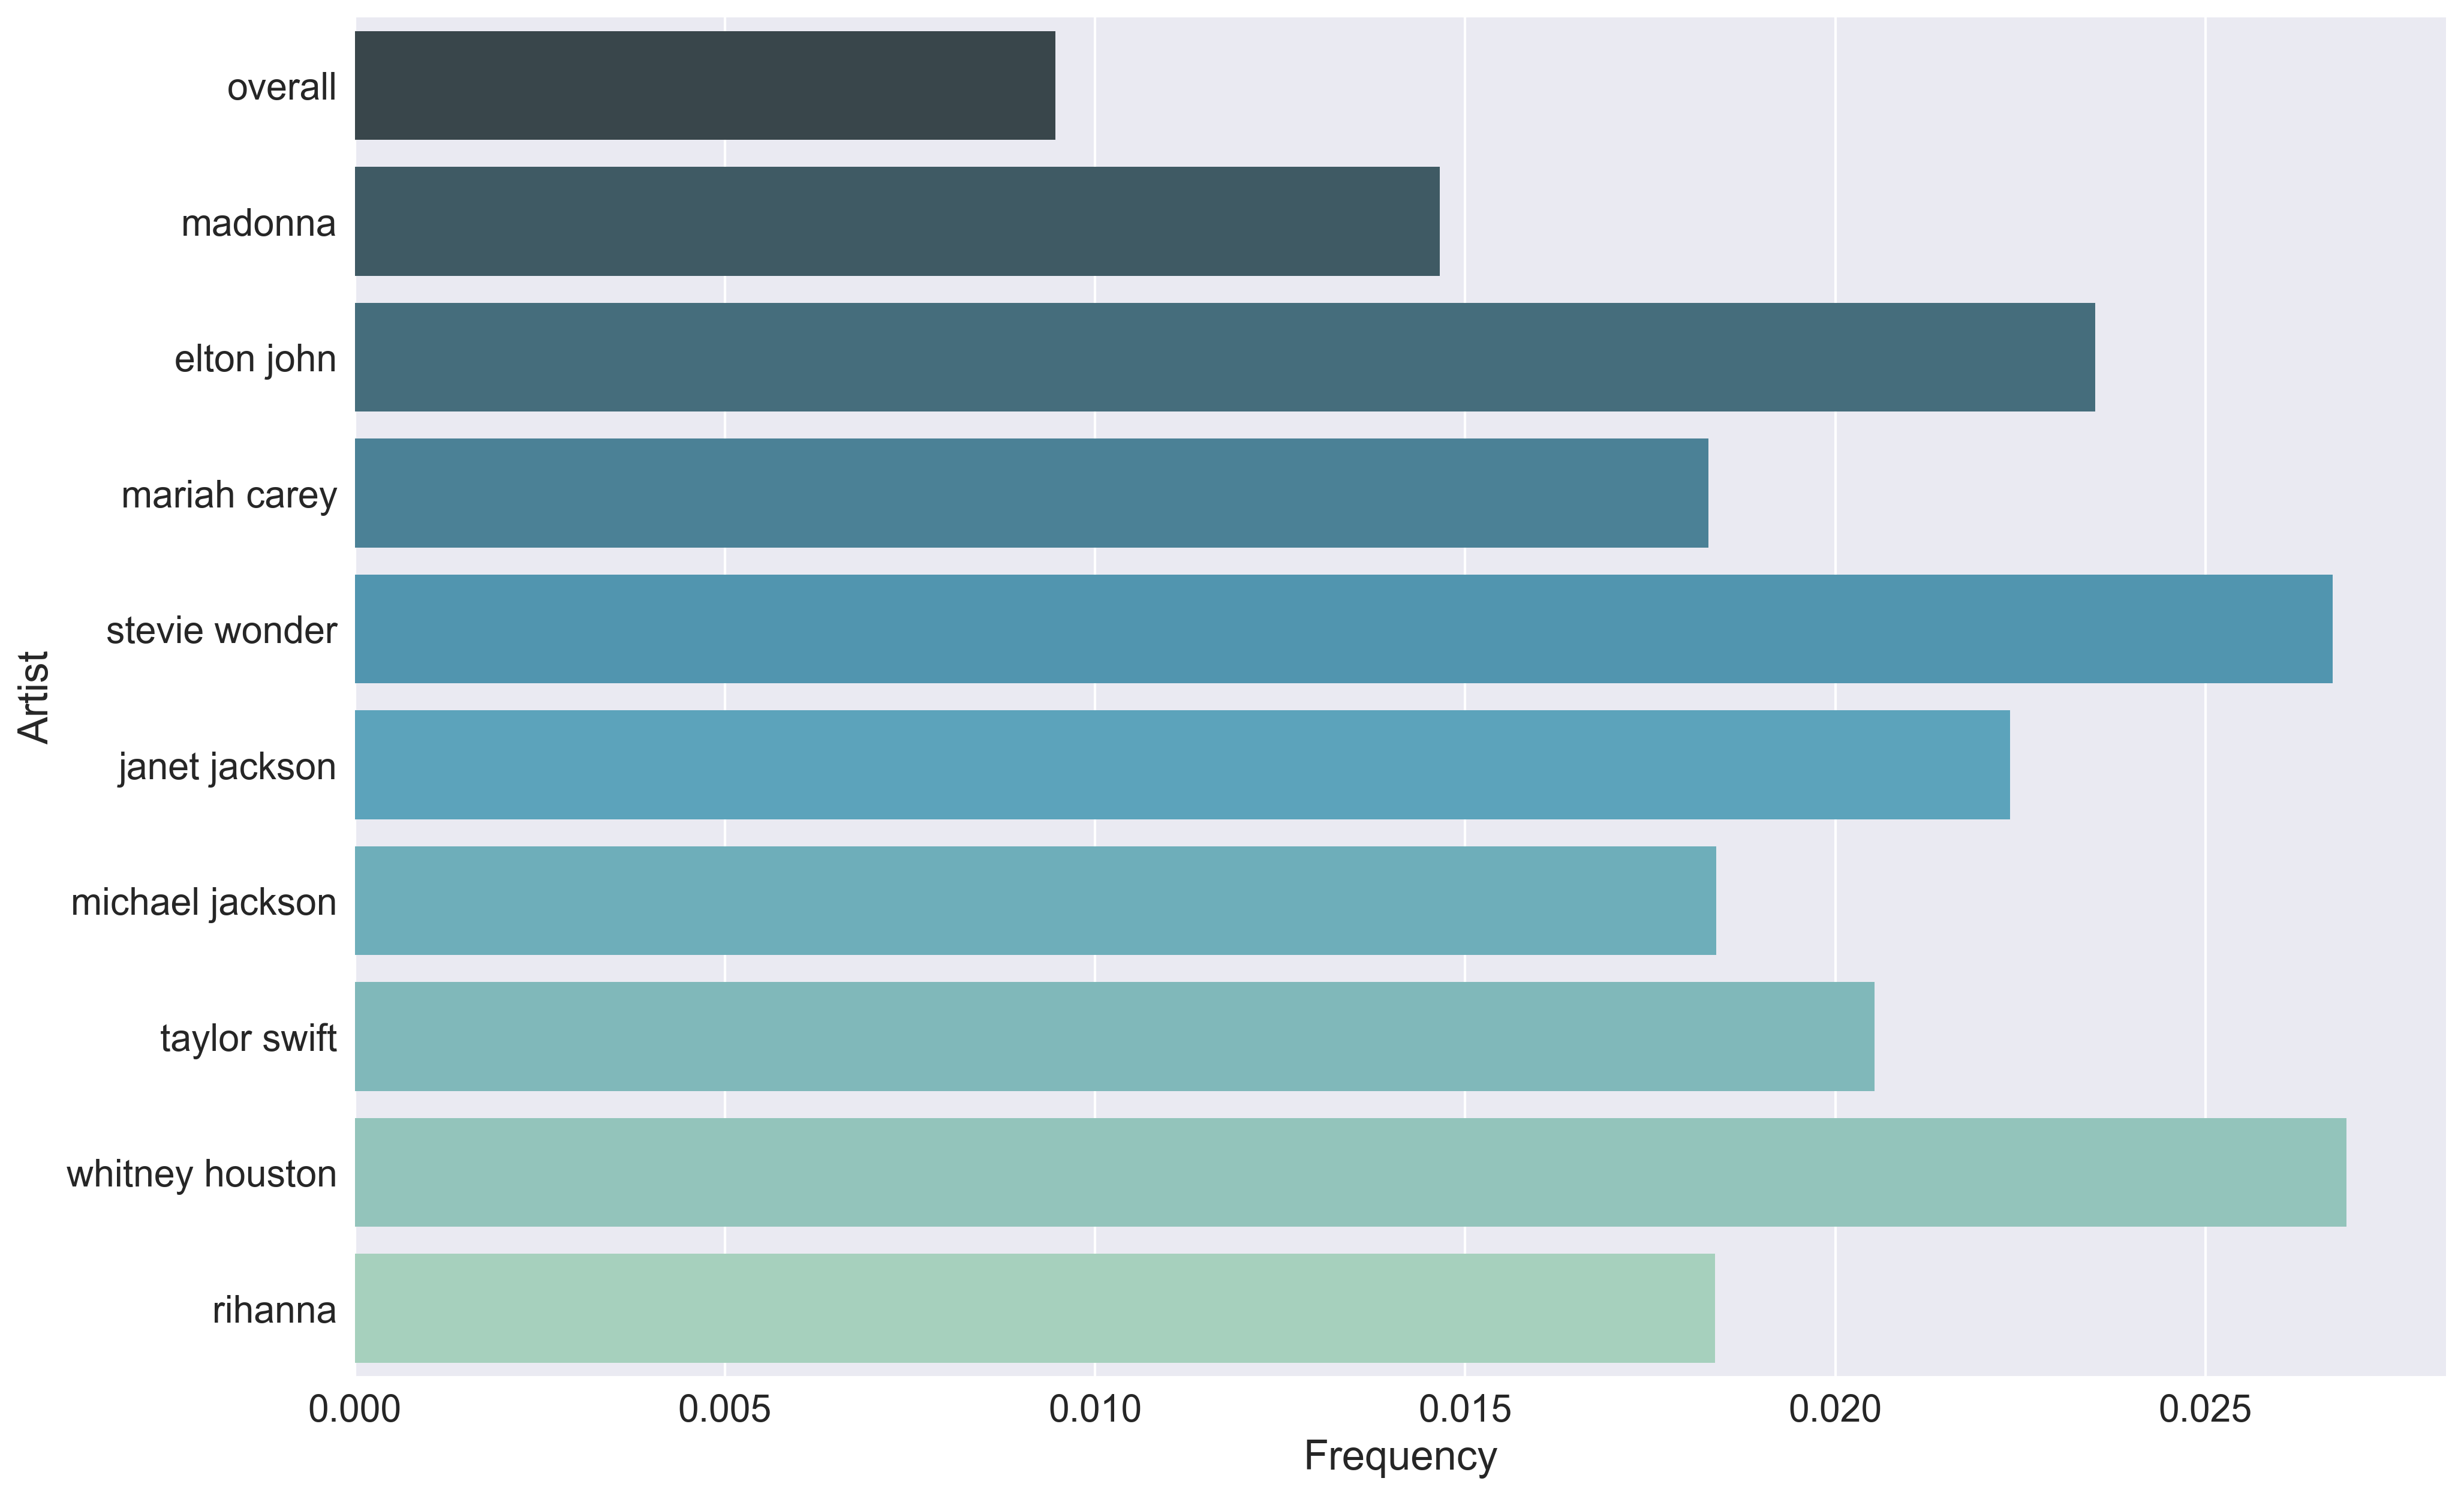

In [46]:
artist_table = pd.DataFrame(data={'Artist': artists_and_overall[:10], 'Frequency':top_artist_freq[:10]})
plt.subplots(dpi=300, figsize=(15, 10))
sns.set(font_scale=1.5)
#plt.title()
sns.barplot(x = artist_table['Frequency'], y=artist_table['Artist'], palette=("GnBu_d"));

In [47]:
lyrics[lyrics['Artist']=='whitney houston']

,Rank,Song,Artist,Year,Lyrics,Source
2022,23,saving all my love for you,whitney houston,1985,a few stolen moments is all that we share you...,1.0
2046,47,you give good love,whitney houston,1985,haa haa i found out what ive been missin alwa...,1.0
2105,6,how will i know,whitney houston,1986,theres a boy i know hes the one i dream of lo...,1.0
2110,11,greatest love of all,whitney houston,1986,i believe the children are our are future tea...,1.0
2203,4,i wanna dance with somebody who loves me,whitney houston,1987,clock strikes upon the hour and the sun begin...,1.0
2221,22,didnt we almost have it all,whitney houston,1987,remember when we held on in the rain the nigh...,1.0
2305,6,so emotional,whitney houston,1988,ive been hearing your heartbeat inside of me ...,1.0
2332,33,where do broken hearts go,whitney houston,1988,i know its been some time but theres somethin...,1.0
2388,89,one moment in time,whitney houston,1988,each day i live i want to be a day to give th...,1.0
2615,16,all the man that i need,whitney houston,1991,i used to cry myself to sleep at night but th...,1.0


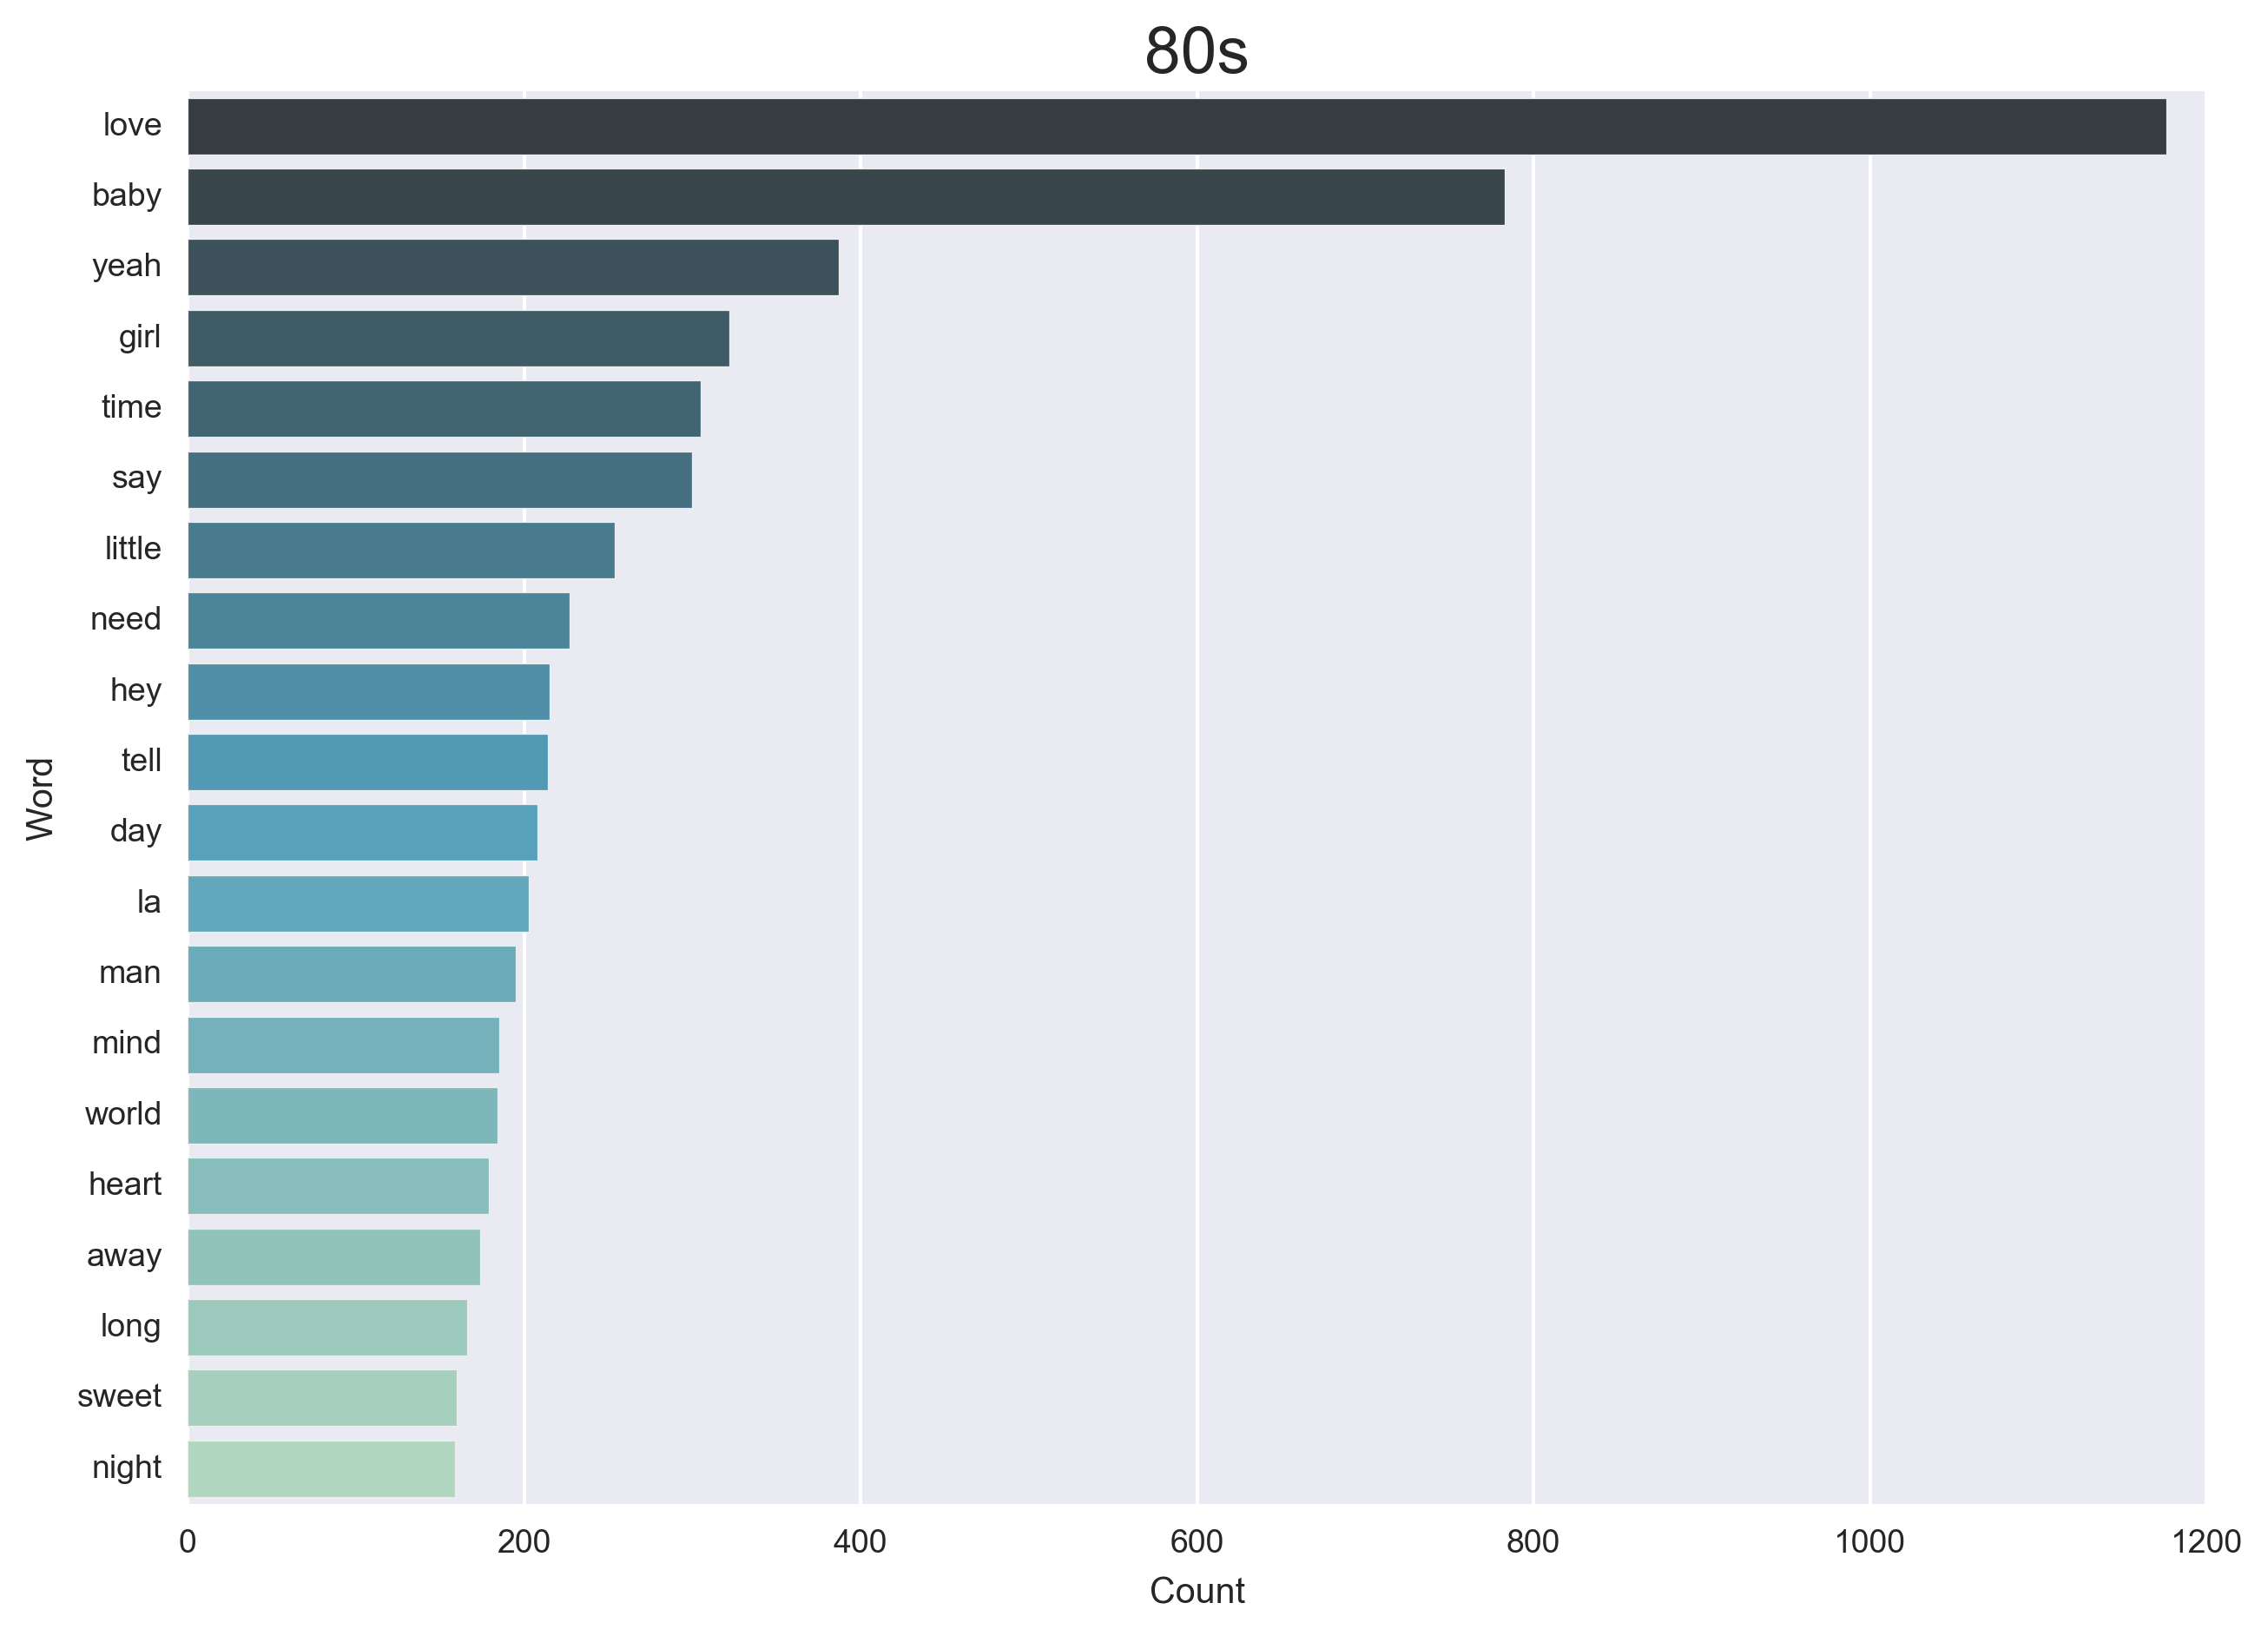

In [346]:
####Backup code for bar charts.
plt.subplots(figsize=(10,7), dpi=300)
sns.set(font_scale=1.5)

sorted_words1 = sorted(list(zip(cv_fn1, np.asarray(cv1.sum(axis=0)).ravel())), key=lambda x: x[1], reverse=True)
words, count = [i[0] for i in sorted_words1], [i[1] for i in sorted_words1]
top_words1 = pd.DataFrame(data={'Word' : words, 'Count': count}).take([1, 0], axis=1).iloc[np.arange(20)]
plt.title('80s')
sns.barplot(x = top_words1['Count'], y=top_words1['Word'], palette=("GnBu_d"));